# Exploratory Data Analysis (EDA) of Films

O objetivo principal deste projeto é extrair, tratar e analisar dados de filmes listados no IMDb para gerar insights que possam ser úteis para profissionais da indústria cinematográfica, pesquisadores, e entusiastas do cinema.

## Etapas do Projeto:

### Etapa 1: Coleta de dados
Gerar funções que interajam com a API OMDb para coletar de forma automatizada um conjunto de dados abrangente de filmes.

### Etapa 2: Limpeza e pré-processamento dos dados
Empregar métodos de limpeza de dados e pré-processamento para garantir que o conjunto de dados esteja em um estado ideal para análise. Isso inclui tratamento de valores ausentes e transformações dos dados, assim como a identificação e remoção de outliers.

### Etapa 3: Análise exploratória de dados (EDA) e visualizações
Implementar uma análise exploratória abrangente, utilizando estatísticas descritivas e técnicas de análise de dados para identificar padrões, tendências e possíveis correlações nos dados. Partindo de análises unidimensionais até bidimensionais. Assim como, criar uma série de visualizações de dados impactantes e informativas que complementem e aprimorem os insights gerados durante a fase de análise exploratória.

### Etapa 4: Conclusões
Com base na análise exploratória de dados e nas visualizações, sintetizar os principais insights e descobertas obtidos a partir do conjunto de dados e sugerir áreas de pesquisa e análise futuras que podem ser exploradas para aprofundar o entendimento sobre o tema e gerar novos insights.

### Disclaimer
Este projeto foi desenvolvido exclusivamente para fins educacionais e de demonstração de habilidades. Ele não tem nenhum objetivo comercial ou de lucro. Todos os dados utilizados neste projeto são de domínio público ou foram adquiridos e utilizados de acordo com as diretrizes e termos de uso fornecidos pelas respectivas fontes de dados.

As técnicas de coleta de dados e análise demonstradas aqui são representativas das habilidades do autor em manipulação de dados e desenvolvimento de software, e não pretendem infringir quaisquer diretrizes ou leis de direitos autorais. Qualquer uso dos métodos ou dados apresentados neste projeto deve ser feito de acordo com as leis e regulamentos aplicáveis.

#### Importando bibliotecas necessárias

In [2]:
import requests
import time
import matplotlib.pyplot as plt
import csv
import json
import pandas as pd
import seaborn as sns

#### Definindo funções úteis

In [3]:
# Função para guardar os dados num ficheiro json
def save_data_to_file(data, filename):
    with open(filename, 'w') as file:
        json.dump(data, file)

# Função para carregar os dados de um ficheiro json
def load_data_from_file(filename):
    with open(filename, 'r') as file:
        return json.load(file)

## Etapa 1: Coleta de Dados

### Definindo a amostra

- A coleta de dados é realizada em duas etapas: inicialmente, coletamos os ID's dos filmes que queremos obter os dados. Estes IDs são então utilizados como parâmetros para solicitações à API OMDb, a fim de obter o conjunto de dados.
  
- A seleção de filmes para esta análise foi restrita àqueles que receberam um mínimo de 150 avaliações de usuários. Este critério foi estabelecido para garantir que as notas dos filmes sejam confiáveis e representativas da percepção geral do público sobre um determinado filme.

- O limite de 150 avaliações serve como um ponto de equilíbrio: é alto o suficiente para conferir credibilidade às notas, mas baixo o suficiente para evitar a introdução de um viés de popularidade. Isso permite que filmes menos conhecidos, mas ainda bem avaliados, sejam inclusos na análise, oferecendo um panorama mais abrangente do cenário cinematográfico.

Nota: Durante a realização deste projeto, tornei-me mais consciente das complexidades relacionadas à propriedade intelectual e aos direitos autorais na coleta de dados. Embora não tenha havido intenção de infringir quaisquer direitos e o objetivo do projeto não seja comercial, reconheço que é crucial respeitar as diretrizes e práticas legais vigentes. Com isso em mente, optei por não detalhar os métodos exatos de coleta dos IDs dos filmes. Também afirmo que este projeto reforçou meu compromisso com a ética na coleta de dados e influenciará positivamente minha abordagem em futuros projetos.

### Definindo a função get_movie_data() usada para interagir com a API OMDb

In [27]:
api_key = "xxxxx"

# Função para obter dados de um único filme a partir de seu ID no IMDb usando a API OMDb
def get_movie_data(movie_id):
    max_retries = 3  # Número máximo de tentativas
    retries = 0  # Contador inicial de tentativas
    while retries < max_retries:
        # Constrói a URL da API usando a chave da API e o ID do filme
        url = f"http://www.omdbapi.com/?apikey={api_key}&i={movie_id}"

        # Faz uma requisição GET à API para obter o JSON contendo os dados do filme
        response = requests.get(url)

        # Verifica se a requisição foi bem-sucedida (código de status HTTP 200)
        if response.status_code == 200:
            # Converte a resposta JSON em um dicionário Python
            movie_data = response.json()

            try:
                # Extrai os campos necessários dos dados do filme
                titulo = movie_data['Title']
                ano = int(movie_data['Year']) 
                imdb_rating = float(movie_data['imdbRating']) if movie_data['imdbRating'] != 'N/A' else None
                imdb_votes = int(movie_data['imdbVotes'].replace(',', '')) if movie_data['imdbVotes'] != 'N/A' else None
                generos = movie_data['Genre'].split(', ')
                try: # Tentativa de extrair a duração em minutos
                    duracao = int(movie_data['Runtime'].split(' ')[0]) if movie_data['Runtime'] != 'N/A' else None
                except ValueError:  # Caso em que a duração vem em um formato inesperado
                    if 'S' in movie_data['Runtime']: # Verificando se a duração está em segundos ('S')
                        duracao = int(movie_data['Runtime'].split('S')[0]) / 60.0
                    else:
                        raise ValueError(f"Unexpected runtime format for movie ID {movie_id}: {movie_data['Runtime']}")
                diretor = movie_data['Director']

                # Retorna um dicionário contendo os dados extraídos
                return {'titulo': titulo, 'ano': ano, 'imdb_rating': imdb_rating, 'imdb_votes': imdb_votes, 
                        'generos': generos, 'duracao': duracao, 'diretor': diretor}

            # Captura o erro se algum campo não estiver disponível no JSON
            except KeyError:
                print(f"Error: Missing data for movie ID {movie_id}")
                return None

        # Caso a requisição à API falhe, imprime o código de status HTTP
        else:
            print(f"Error: Unable to fetch data for movie ID {movie_id}. Status code: {response.status_code}")
            retries += 1  # Incrementa o contador de tentativas
            time.sleep(5)  # Espera por 5 segundos antes de tentar novamente
    # Se o código chegou até aqui, é porque todas as tentativas falharam
    print(f"Error: Maximum number of attempts for movie ID {movie_id} exceeded.")
    return None

### Testando a função

In [28]:
# Testamos a função com o filme com o ID tt0099088 (Back to the Future III)
print(get_movie_data("tt0099088"))

{'titulo': 'Back to the Future Part III', 'ano': 1990, 'imdb_rating': 7.4, 'imdb_votes': 464728, 'generos': ['Adventure', 'Comedy', 'Sci-Fi'], 'duracao': 118, 'diretor': 'Robert Zemeckis'}


### Definindo a função de coleta

In [6]:
# Função para retomar a coleta de dados de filmes a partir de uma lista de IDs de filmes
def resume_data_collection(movie_ids, filename):
    # Tenta carregar dados previamente coletados a partir de um arquivo JSON
    # Se o arquivo não existir, inicializa um novo dicionário para armazenar os dados
    try:
        data = load_data_from_file(filename)
    except FileNotFoundError:
        data = {
            'titulo': [],
            'ano': [],
            'imdb_rating': [],
            'imdb_votes': [],
            'generos': [],
            'duracao': [],
            'diretor': []
        }

    # Determina o ponto de início para retomar a coleta, baseado na quantidade de títulos já coletados
    start_index = len(data['titulo'])
    
    # Loop através dos IDs de filmes para coletar informações
    for movie_id in movie_ids[start_index:]:
        # Chama a função get_movie_data para obter informações de cada filme
        movie_info = get_movie_data(movie_id)
        
        # Se informações foram retornadas, armazena nos respectivos campos do dicionário
        if movie_info is not None:
            data['titulo'].append(movie_info['titulo'])
            data['ano'].append(movie_info['ano'])
            data['imdb_rating'].append(movie_info['imdb_rating'])
            data['imdb_votes'].append(movie_info['imdb_votes'])
            data['generos'].append(movie_info['generos'])
            data['duracao'].append(movie_info['duracao'])
            data['diretor'].append(movie_info['diretor'])

        # Exibe o progresso da coleta e salva os dados temporariamente a cada 500 filmes coletados
        current_index = len(data['titulo'])
        if current_index % 500 == 0:
            print(f"Progress: Collected {current_index} out of {len(movie_ids)} movies.")
            save_data_to_file(data, filename)

    # Salva o dicionário completo de dados coletados em um arquivo JSON ao final da execução
    save_data_to_file(data, filename)

    return data

In [29]:
# Aqui começamos a coleta de dados.
# Como a coleta é lenta, executamos esta célula até termos coletado todos os dados desejados, 
# dessa forma podemos pausar o quanto quisermos.
data = resume_data_collection(movies_ids_list, 'collected_data.json')

Progress: Collected 82000 out of 94840 movies.
Progress: Collected 82500 out of 94840 movies.
Progress: Collected 83000 out of 94840 movies.
Progress: Collected 83500 out of 94840 movies.
Progress: Collected 84000 out of 94840 movies.
Progress: Collected 84500 out of 94840 movies.
Progress: Collected 85000 out of 94840 movies.
Progress: Collected 85500 out of 94840 movies.
Progress: Collected 86000 out of 94840 movies.
Progress: Collected 86500 out of 94840 movies.
Progress: Collected 87000 out of 94840 movies.
Progress: Collected 87500 out of 94840 movies.
Progress: Collected 88000 out of 94840 movies.
Progress: Collected 88500 out of 94840 movies.
Progress: Collected 89000 out of 94840 movies.
Progress: Collected 89500 out of 94840 movies.
Progress: Collected 90000 out of 94840 movies.
Progress: Collected 90500 out of 94840 movies.
Progress: Collected 91000 out of 94840 movies.
Progress: Collected 91500 out of 94840 movies.
Progress: Collected 92000 out of 94840 movies.
Progress: Col

In [ ]:
save_data_to_file(data, filename) # Salvando depois de coletar todos os IDs

In [6]:
# Aqui verificamos quantos títulos de filmes foram coletados até agora.
data1 = load_data_from_file('collected_data.json')
len(data1['titulo'])

94785

Alguns IDs não foram encontrados na API, mesmo assim, foi possível coletar dados de 94785 filmes, de um total de 94840

## Etapa 2: Limpeza e pré-processamento dos dados

### Utilizando a biblioteca Pandas para obter uma visão geral dos dados

In [11]:
# Carregar o arquivo JSON em um DataFrame
data_dict = load_data_from_file('../../data/150_votes/raw/collected_data.json')
df = pd.DataFrame.from_dict(data_dict)

In [12]:
# Mostrar as primeiras linhas para uma visão geral rápida
df.head()

,titulo,ano,imdb_rating,imdb_votes,generos,duracao,diretor
0,Miss Jerry,1894,5.9,206.0,[Romance],45.0,Alexander Black
1,The Passion Play,1903,6.4,611.0,"[Biography, Drama]",45.0,"Lucien Nonguet, Ferdinand Zecca"
2,The Story of the Kelly Gang,1906,6.0,831.0,"[Action, Adventure, Biography]",70.0,Charles Tait
3,Dante's Inferno,1911,7.0,3198.0,"[Adventure, Drama, Fantasy]",71.0,"Francesco Bertolini, Adolfo Padovan, Giuseppe ..."
4,Pinocchio,1911,5.8,182.0,[Fantasy],50.0,Giulio Antamoro


In [13]:
# Exibir estatísticas resumidas
df.describe(include='all')

,titulo,ano,imdb_rating,imdb_votes,generos,duracao,diretor
count,94785,94785.000000,93614.000000,9.463700e+04,94785,93704.000000,94785
unique,86122,NaN,NaN,NaN,1202,NaN,38931
top,Mother,NaN,NaN,NaN,[Drama],NaN,Jesús Franco
freq,14,NaN,NaN,NaN,12719,NaN,92
mean,NaN,1996.248689,5.850590,1.103854e+04,NaN,100.819990,NaN
std,NaN,24.555352,1.260838,6.200713e+04,NaN,23.294127,NaN
min,NaN,1894.000000,1.000000,5.000000e+00,NaN,0.350000,NaN
25%,NaN,1982.000000,5.100000,2.880000e+02,NaN,88.000000,NaN
50%,NaN,2005.000000,6.100000,6.660000e+02,NaN,96.000000,NaN
75%,NaN,2015.000000,6.700000,2.408000e+03,NaN,109.000000,NaN


In [14]:
# Mostrar informações sobre tipos de dados e valores faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94785 entries, 0 to 94784
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   titulo       94785 non-null  object 
 1   ano          94785 non-null  int64  
 2   imdb_rating  93614 non-null  float64
 3   imdb_votes   94637 non-null  float64
 4   generos      94785 non-null  object 
 5   duracao      93704 non-null  float64
 6   diretor      94785 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 5.1+ MB


### Verificação de Dados Faltantes

In [15]:
# Verificar dados faltantes em cada coluna
df.isnull().sum()

titulo            0
ano               0
imdb_rating    1171
imdb_votes      148
generos           0
duracao        1081
diretor           0
dtype: int64

In [16]:
df = df.dropna() # Removendo as linhas com dados faltantes

In [17]:
# Verificar dados faltantes em cada coluna
df.isnull().sum()

titulo         0
ano            0
imdb_rating    0
imdb_votes     0
generos        0
duracao        0
diretor        0
dtype: int64

In [18]:
# Verificando a quantidade de linhas e colunas
df.shape

(92716, 7)

In [19]:
# Iterando sobre todas as colunas para retirar valores N/A em forma de string
for col in df.columns:
    mask = df[col].apply(lambda x: 'N/A' not in x if isinstance(x, (list, str)) else True)
    df = df[mask]

In [20]:
# Verificando o resultado após aplicar a máscara a todas as colunas
df.shape

(92637, 7)

In [122]:
# Verificar dados faltantes em cada coluna
df.isnull().sum()

titulo         0
ano            0
imdb_rating    0
imdb_votes     0
generos        0
duracao        0
diretor        0
dtype: int64

O conjunto de dados apresenta algumas linhas com valores faltantes. A estratégia adotada é remover essas linhas para simplificar as análises estatísticas posteriores. O conjunto de dados possui um volume considerável de dados, tornando esta abordagem viável e minimizando o impacto potencial na qualidade dos insights derivados da análise.

### Modificando a coluna 'generos'

#### Como a coluna 'generos' possui uma lista de gêneros, iremos separá-los em colunas diferentes

In [21]:
# Criar novas colunas para os gêneros primário, secundário e terciário
df['genero_primario'] = df['generos'].apply(lambda x: x[0] if len(x) > 0 else None)
df['genero_secundario'] = df['generos'].apply(lambda x: x[1] if len(x) > 1 else None)
df['genero_terciario'] = df['generos'].apply(lambda x: x[2] if len(x) > 2 else None)

# Remover a coluna original 'generos'
df.drop(columns=['generos'], inplace=True)

In [22]:
# Verificar as primeiras linhas do novo DataFrame para confirmar as alterações
df.head()

,titulo,ano,imdb_rating,imdb_votes,duracao,diretor,genero_primario,genero_secundario,genero_terciario
0,Miss Jerry,1894,5.9,206.0,45.0,Alexander Black,Romance,None,None
1,The Passion Play,1903,6.4,611.0,45.0,"Lucien Nonguet, Ferdinand Zecca",Biography,Drama,None
2,The Story of the Kelly Gang,1906,6.0,831.0,70.0,Charles Tait,Action,Adventure,Biography
3,Dante's Inferno,1911,7.0,3198.0,71.0,"Francesco Bertolini, Adolfo Padovan, Giuseppe ...",Adventure,Drama,Fantasy
4,Pinocchio,1911,5.8,182.0,50.0,Giulio Antamoro,Fantasy,None,None


### Verificando duplicatas

In [23]:
# Contar o número de linhas duplicadas
df.duplicated().sum()

0

### Verificando os tipos dos dados

In [24]:
# Verificar os tipos de dados das colunas no DataFrame
df.dtypes

titulo                object
ano                    int64
imdb_rating          float64
imdb_votes           float64
duracao              float64
diretor               object
genero_primario       object
genero_secundario     object
genero_terciario      object
dtype: object

In [25]:
# Convertendo a coluna 'imdb_votes' para inteiros, mantendo NaNs
df['imdb_votes'] = df['imdb_votes'].astype('int64')

In [26]:
# Verificando novamente os dados
df.dtypes

titulo                object
ano                    int64
imdb_rating          float64
imdb_votes             int64
duracao              float64
diretor               object
genero_primario       object
genero_secundario     object
genero_terciario      object
dtype: object

### Detecção de Outliers

In [27]:
# Função para calcular os limites para outliers com base no IQR
def calculate_iqr_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [28]:
# Calcular os limites para outliers para as colunas "imdb_rating" e "duracao"
imdb_rating_lower, imdb_rating_upper = calculate_iqr_bounds(df['imdb_rating'])
duracao_lower, duracao_upper = calculate_iqr_bounds(df['duracao'])

# Identificar os outliers
outliers_imdb_rating = df[(df['imdb_rating'] < imdb_rating_lower) | (df['imdb_rating'] > imdb_rating_upper)]
outliers_duracao = df[(df['duracao'] < duracao_lower) | (df['duracao'] > duracao_upper)]

# Exibir os limites e o número de outliers para cada coluna
imdb_rating_lower, imdb_rating_upper, len(outliers_imdb_rating), duracao_lower, duracao_upper, len(outliers_duracao)

(2.699999999999999, 9.100000000000001, 1526, 56.5, 140.5, 5753)

Utilizando o método do Intervalo Interquartil (IQR), obtivemos as seguintes informações sobre outliers nas colunas selecionadas:

### Para `imdb_rating`:
- Limite Inferior: \(2.7\)
- Limite Superior: \(9.1\)
- Número de Outliers: \(1526\)

### Para `duracao`:
- Limite Inferior: \(56.5\) minutos
- Limite Superior: \(140.5\) minutos
- Número de Outliers: \(5753\)

In [29]:
# Filtrando os outliers das colunas "imdb_rating" e "duracao"
df_filtered = df[(df['imdb_rating'] >= imdb_rating_lower) & (df['imdb_rating'] <= imdb_rating_upper)]
df_filtered = df_filtered[(df_filtered['duracao'] >= duracao_lower) & (df_filtered['duracao'] <= duracao_upper)]

In [30]:
# Exibir as primeiras linhas do DataFrame após a remoção dos outliers
df_filtered.shape

(85430, 9)

In [31]:
df.isnull().sum()

titulo                   0
ano                      0
imdb_rating              0
imdb_votes               0
duracao                  0
diretor                  0
genero_primario          0
genero_secundario    26269
genero_terciario     55869
dtype: int64

In [32]:
df_filtered.isnull().sum()

titulo                   0
ano                      0
imdb_rating              0
imdb_votes               0
duracao                  0
diretor                  0
genero_primario          0
genero_secundario    24537
genero_terciario     52029
dtype: int64

### Salvando o dataframe

In [33]:
# Salvar o dataframe no formato Pickle
df.to_pickle('../data/processed/dados_limpos.pkl')

# Salvar o dataframe no formato Excel
df.to_excel('../data/processed/dados_limpos.xlsx', index=False)

In [34]:
# Salvar o dataframe filtrado no formato Pickle
df_filtered.to_pickle('../data/processed/dados_limpos_filtrados.pkl')

# Salvar o dataframe filtrado no formato Excel
df_filtered.to_excel('../data/processed/dados_limpos_filtrados.xlsx', index=False)

### Vamos salvar os outliers em arquivos separados para análise posterior

In [35]:
# Salvar outliers de imdb_rating em formato Pickle e Excel
outliers_imdb_rating.to_pickle('../data/outliers/outliers_imdb_rating.pkl')
outliers_imdb_rating.to_excel('../data/outliers/outliers_imdb_rating.xlsx', index=False)

# Salvar outliers de duracao em formato Pickle e Excel
outliers_duracao.to_pickle('../data/outliers/outliers_duracao.pkl')
outliers_duracao.to_excel('../data/outliers/outliers_duracao.xlsx', index=False)

Decidi prosseguir com a análise removendo os outliers identificados através do método do intervalo interquartil (IQR). Os outliers podem distorcer os resultados e afetar a qualidade das análises estatísticas. Para manter a integridade do estudo, salvei os dados dos outliers em um arquivo separado. Isso permitirá uma análise mais aprofundada no futuro, caso seja necessário.

# Etapa 3: Análise exploratória de dados (EDA) e visualizações

## Carregando os dados limpos e filtrados

In [4]:
df = pd.read_pickle('../data/processed/dados_limpos_filtrados.pkl')

In [5]:
df.isna().sum()

titulo                   0
ano                      0
imdb_rating              0
imdb_votes               0
duracao                  0
diretor                  0
genero_primario          0
genero_secundario    24537
genero_terciario     52029
dtype: int64

## Estatísticas descritivas básicas

In [6]:
# Obter estatísticas descritivas das colunas numéricas
# Isso inclui contagem, média, desvio padrão, mínimo, 25º percentil, mediana (50º percentil), 75º percentil e máximo
estatisticas_numericas = df.describe()

# Para colunas categóricas (neste caso, as colunas de gênero e diretor), podemos obter a contagem de valores únicos e o valor mais frequente
estatisticas_categoricas = df[['genero_primario', 'genero_secundario', 'genero_terciario', 'diretor']].describe(include='object')

print(estatisticas_numericas)
print(estatisticas_categoricas)

                ano   imdb_rating    imdb_votes       duracao
count  85430.000000  85430.000000  8.543000e+04  85430.000000
mean    1995.490718      5.871018  1.035125e+04     97.622404
std       24.751853      1.151290  5.309136e+04     15.527476
min     1906.000000      2.700000  5.000000e+00     57.000000
25%     1981.000000      5.200000  2.920000e+02     88.000000
50%     2005.000000      6.000000  6.800000e+02     95.000000
75%     2015.000000      6.700000  2.460000e+03    106.000000
max     2023.000000      9.100000  2.208722e+06    140.000000
       genero_primario genero_secundario genero_terciario       diretor
count            85430             60893            33401         85430
unique              21                24               21         35933
top              Drama             Drama         Thriller  Jesús Franco
freq             25304             18398             6274            92


### Estatísticas Numéricas:

1. **Ano (`ano`)**
    - A base de dados contém filmes lançados entre 1906 e 2023.
    - A média de lançamento dos filmes é aproximadamente 1996, o que sugere que a coleção é bastante diversificada em termos de época.
    

2. **Classificação do IMDb (`imdb_rating`)**
    - A média da classificação é de aproximadamente 5.87, com um desvio padrão de 1.15, indicando uma variação moderada nas classificações.
    - As classificações variam de 2.7 a 9.1, conforme os limites definidos durante a remoção de outliers.


3. **Número de Votos no IMDb (`imdb_votes`)**
    - O número médio de votos por filme é de aproximadamente 10,344.
    - O número de votos varia significativamente, com um desvio padrão elevado de 53,072.
  

4. **Duração (`duracao`)**
    - A duração média dos filmes é de aproximadamente 98 minutos.
    - A duração varia de 57 a 140 minutos, com um desvio padrão de aproximadamente 15.5 minutos.


### Estatísticas Categóricas:

1. **Gênero Primário (`genero_primario`)**
    - O conjunto de dados contém 21 gêneros primários únicos.
    - "Drama" é o gênero mais comum, aparecendo 25,311 vezes.


2. **Gênero Secundário (`genero_secundario`)**
    - Existem 24 gêneros secundários únicos.
    - "Drama" também é o gênero secundário mais comum.


3. **Gênero Terciário (`genero_terciario`)**
    - Existem 21 gêneros terciários únicos.
    - "Thriller" é o gênero terciário mais comum.


4. **Diretor (`diretor`)**
    - Há 35,940 diretores únicos no conjunto de dados.
    - Jesús Franco é o diretor mais frequentemente listado, com 92 filmes.

# Análises Unidimensionais

## Variáveis numéricas (ano, classificação, votos e duração):

findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


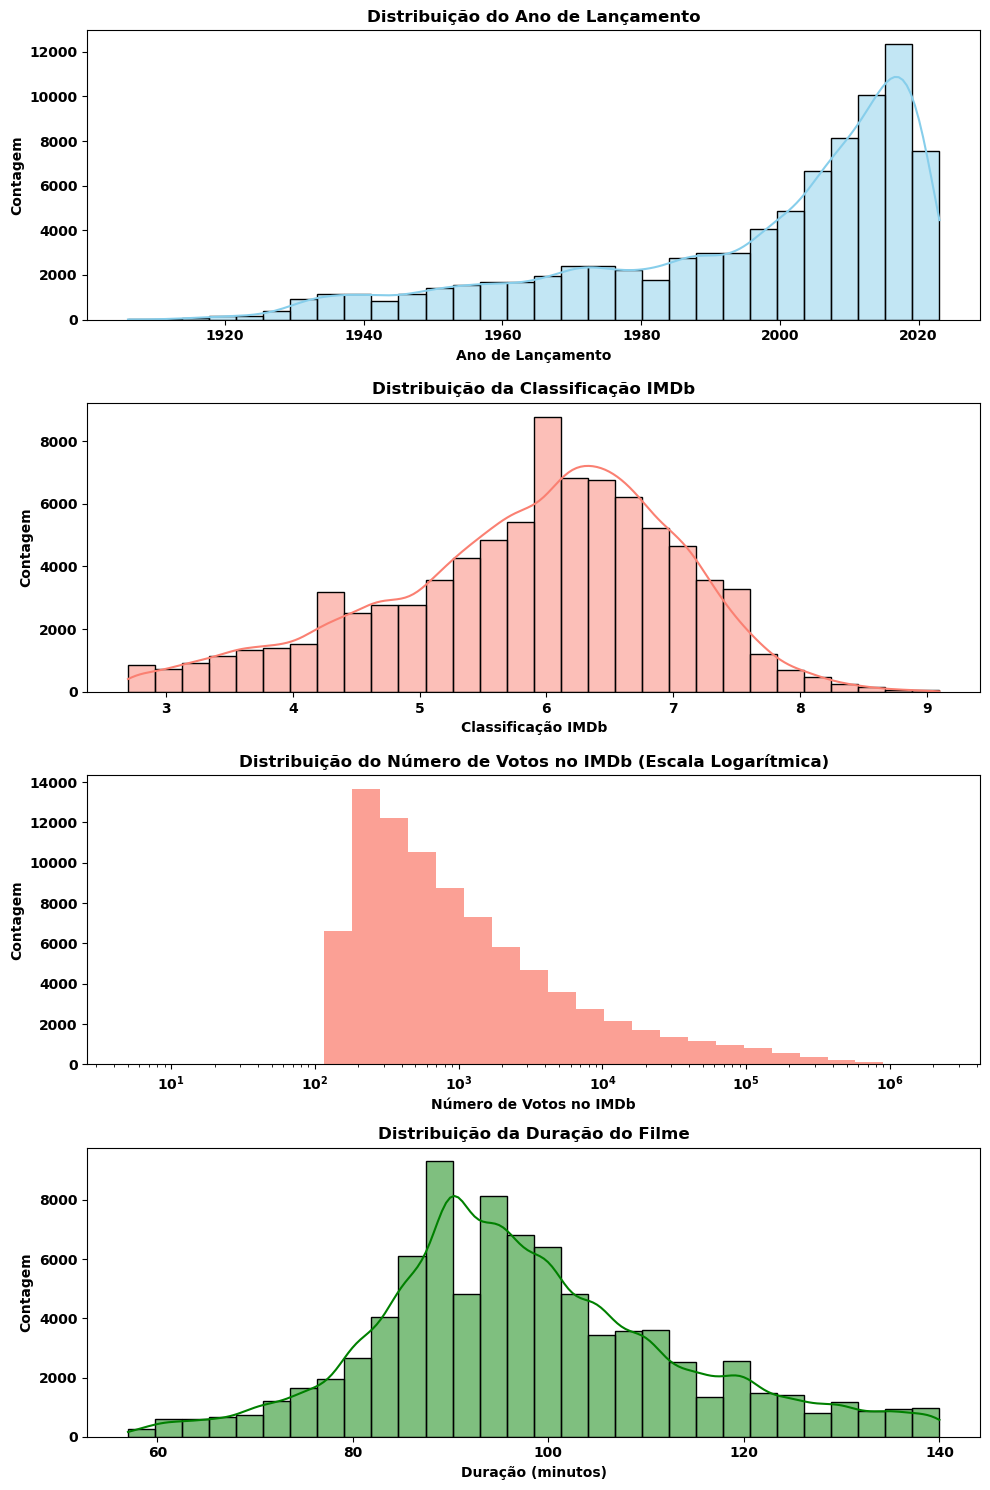

In [7]:
# Criar uma figura com subplots
fig, ax = plt.subplots(4, 1, figsize=(10, 15))

# Histograma para o ano de lançamento
sns.histplot(df['ano'], ax=ax[0], kde=True, color='skyblue', bins=30)
ax[0].set_title('Distribuição do Ano de Lançamento')
ax[0].set_xlabel('Ano de Lançamento')
ax[0].set_ylabel('Contagem')

# Histograma para a classificação IMDb
sns.histplot(df['imdb_rating'], ax=ax[1], kde=True, color='salmon', bins=30)
ax[1].set_title('Distribuição da Classificação IMDb')
ax[1].set_xlabel('Classificação IMDb')
ax[1].set_ylabel('Contagem')

# Histograma para o número de votos no IMDb
# Calcular as bordas dos bins manualmente usando uma escala logarítmica
min_val = df['imdb_votes'].min()
max_val = df['imdb_votes'].max()
bins_log_manual = [min_val * (max_val/min_val)**(i/29) for i in range(30)]

# Desenhar o histograma
sns.histplot(df['imdb_votes'], bins=bins_log_manual, kde=False, color='salmon', ax=ax[2])
ax[2].set_title('Distribuição do Número de Votos no IMDb (Escala Logarítmica)')
ax[2].set_xlabel('Número de Votos no IMDb')
ax[2].set_ylabel('Contagem')
ax[2].set_xscale('log')  # Escala logarítmica para o eixo x

# Histograma para a duração do filme
sns.histplot(df['duracao'], ax=ax[3], kde=True, color='green', bins=30)
ax[3].set_title('Distribuição da Duração do Filme')
ax[3].set_xlabel('Duração (minutos)')
ax[3].set_ylabel('Contagem')

# Ajustar o layout
plt.tight_layout()
plt.show()


**Insights gerais:**

**1. Distribuição do Ano de Lançamento**:
- A maioria dos filmes no conjunto de dados foi lançada após o ano 2000.
- Há uma tendência crescente de filmes após esse ano. Isso pode sugerir que o avanço tecnológico facilitou a produção de filmes, resultando em um aumento no número de lançamentos.
- A diminuição recente se deve em relação à pandemia do COVID-19, que resultou em uma paralisação nas  produções.

**2. Distribuição da Classificação IMDb**:
- A distribuição das classificações do IMDb é aproximadamente normal.
- A maior parte dos filmes tem classificações entre 5 e 7.
- A distribuição é levemente inclinada para a esquerda, o que indica que filmes com classificações extremamente altas são mais raros do que aqueles com classificações baixas.

**3. Distribuição do Número de Votos no IMDb**:
- A coleta foi filtrada para incluir apenas filmes com pelo menos 150 votos.
- O uso da escala logarítmica no eixo \(x\) revela que a maioria dos filmes tem relativamente poucos votos.
- Isso sugere que a quantidade de votos não é necessariamente um indicativo de representatividade ou qualidade do filme.

**4. Distribuição da Duração do Filme**:
- A duração dos filmes segue uma distribuição normal, centrada em torno de 95 a 100 minutos.
- A maioria dos filmes tem uma duração que varia de 80 a 120 minutos.
- Isso sugere que a "duração padrão" para a maioria dos filmes é de aproximadamente 1,5 a 2 horas.

## Variáveis categóricas (gêneros primários, subgêneros e diretores):

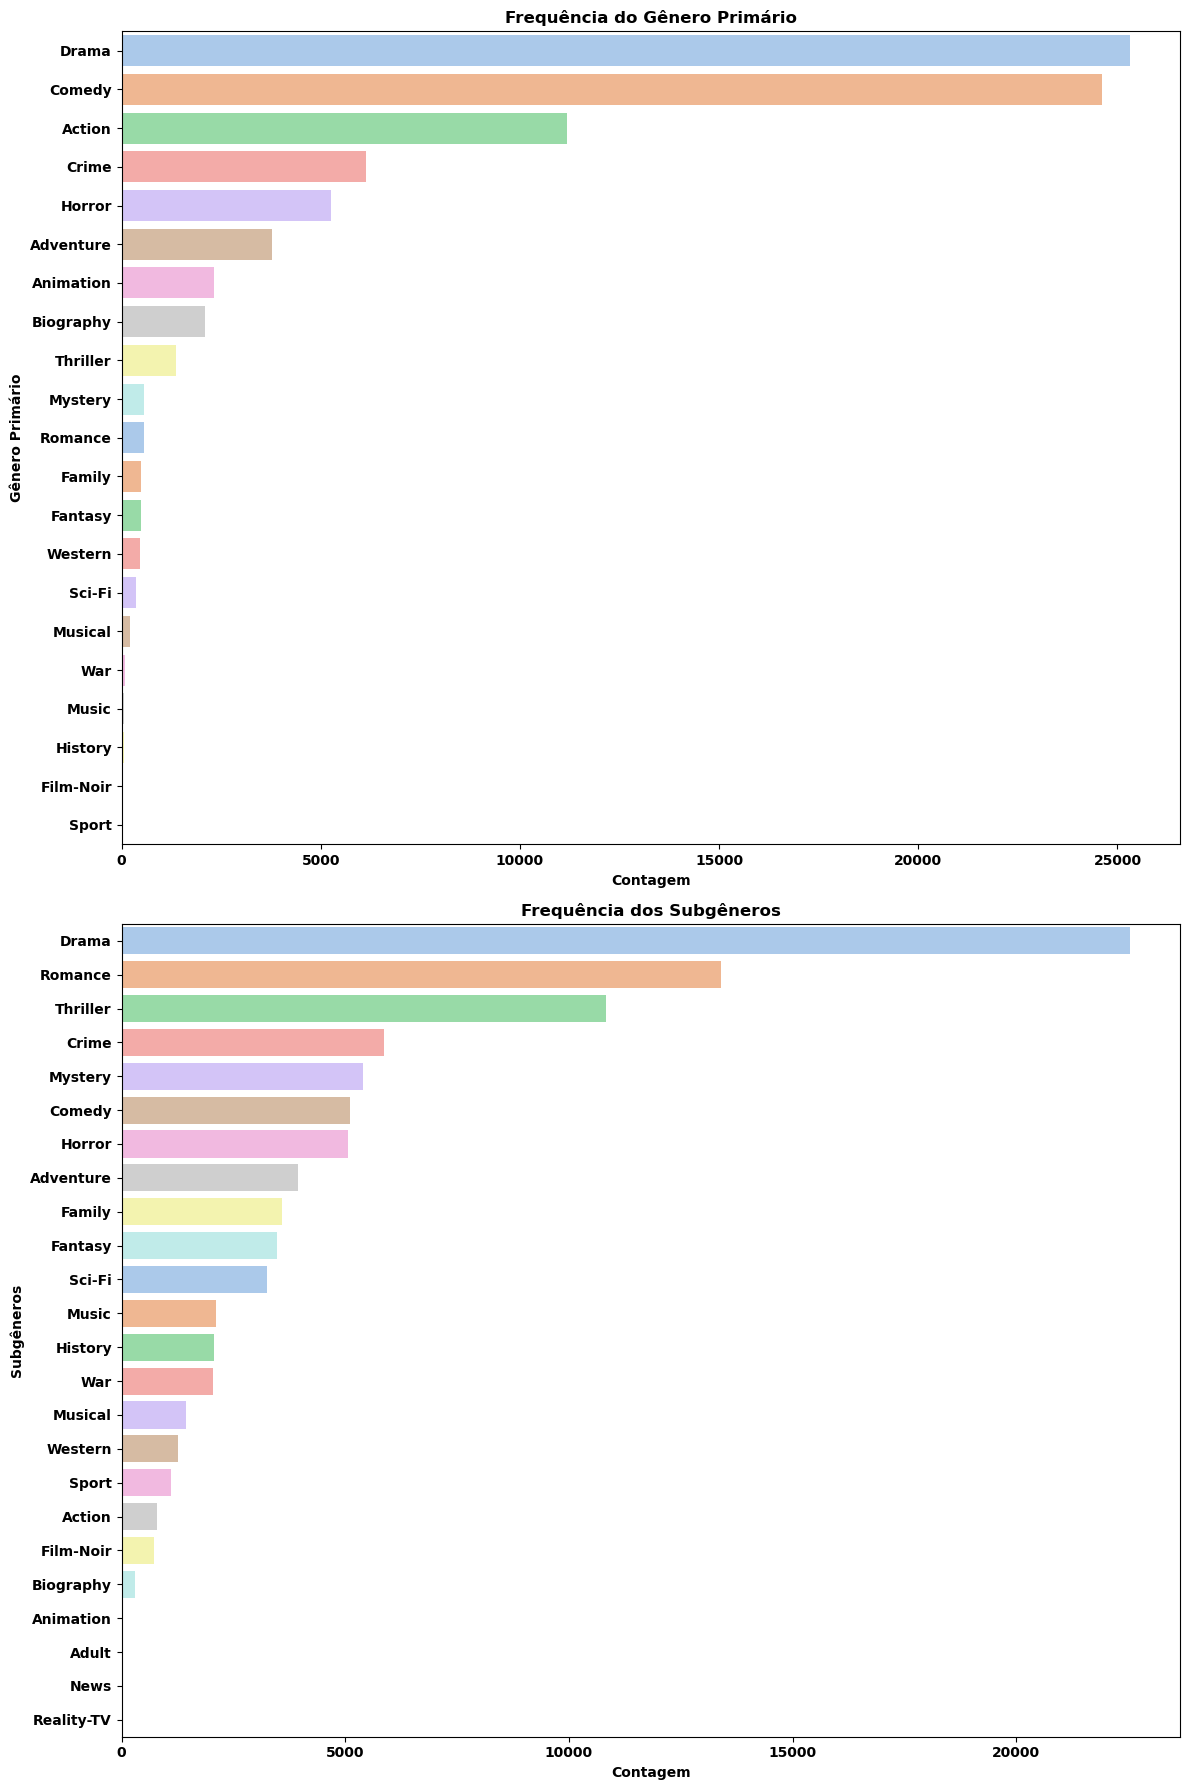

In [8]:
# Criar uma figura com subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 18))

# Gráfico de barras para o gênero primário
sns.countplot(y=df['genero_primario'], ax=ax[0], order=df['genero_primario'].value_counts().index, palette='pastel')
ax[0].set_title('Frequência do Gênero Primário')
ax[0].set_xlabel('Contagem')
ax[0].set_ylabel('Gênero Primário')

# Concatenar as séries 'genero_secundario' e 'genero_terciario' e obter a contagem de valores
subgeneros_counts = pd.concat([df['genero_secundario'], df['genero_terciario']]).value_counts()

# Gráfico de barras para a contagem dos subgêneros usando o segundo subplot
sns.barplot(y=subgeneros_counts.index, x=subgeneros_counts.values, palette='pastel', ax=ax[1])
ax[1].set_title('Frequência dos Subgêneros')
ax[1].set_xlabel('Contagem')
ax[1].set_ylabel('Subgêneros')

# Ajustar o layout
plt.tight_layout()
plt.show()


**Insights Gerais**:
- O **Drama** é um gênero extremamente popular, tanto como gênero principal quanto como subgênero. Isso pode indicar que muitos filmes buscam contar histórias profundas e envolventes que ressoam emocionalmente com o público.
- A presença significativa de **Romance** e **Thriller** como subgêneros sugere que muitos filmes, independentemente de seu gênero principal, incorporam elementos românticos e/ou de suspense, possivelmente para ampliar seu apelo ao público. É interessante ressaltar que estes gêneros são pouco usados como gênero principal, o que sugere que eles não são suficientes para sustentar uma trama por si só.
- A diversidade de gêneros e subgêneros reflete a riqueza e variedade do cinema. Filmes frequentemente mesclam diferentes gêneros para criar narrativas complexas e multidimensionais.

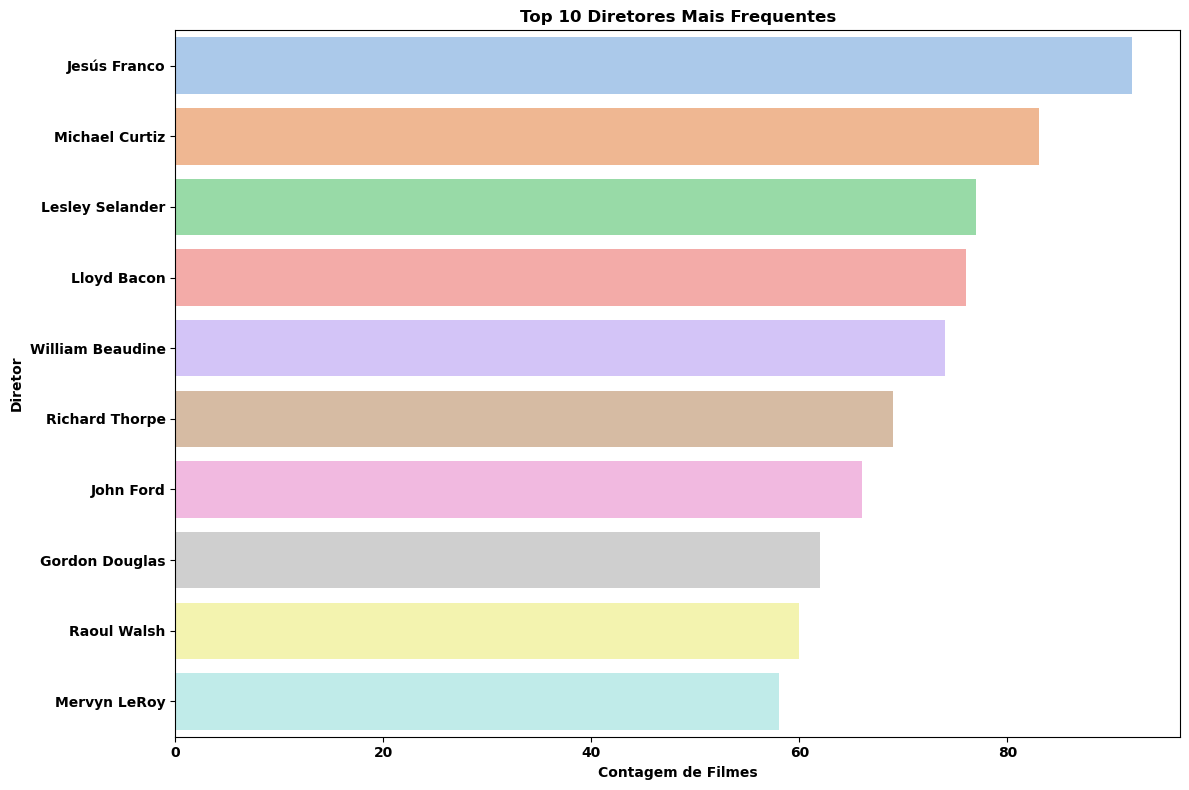

In [9]:
# Gráfico de barras para os 10 diretores mais frequentes

plt.figure(figsize=(12, 8))
sns.countplot(y=df['diretor'], order=df['diretor'].value_counts().iloc[:10].index, palette='pastel')
plt.title('Top 10 Diretores Mais Frequentes')
plt.xlabel('Contagem de Filmes')
plt.ylabel('Diretor')
plt.tight_layout()
plt.show()


**Insights Gerais**:
- A presença dominante de certos diretores sugere que a indústria cinematográfica, como muitas outras indústrias criativas, pode ser influenciada por um pequeno número de indivíduos proeminentes.
- Para cineastas emergentes e estudiosos do cinema, analisar o trabalho dos diretores mais frequentes pode oferecer insights valiosos sobre estilos de direção, narrativa e tendências cinematográficas.

# Análises Bidimensionais

## Mapa de Calor entre variáveis númericas

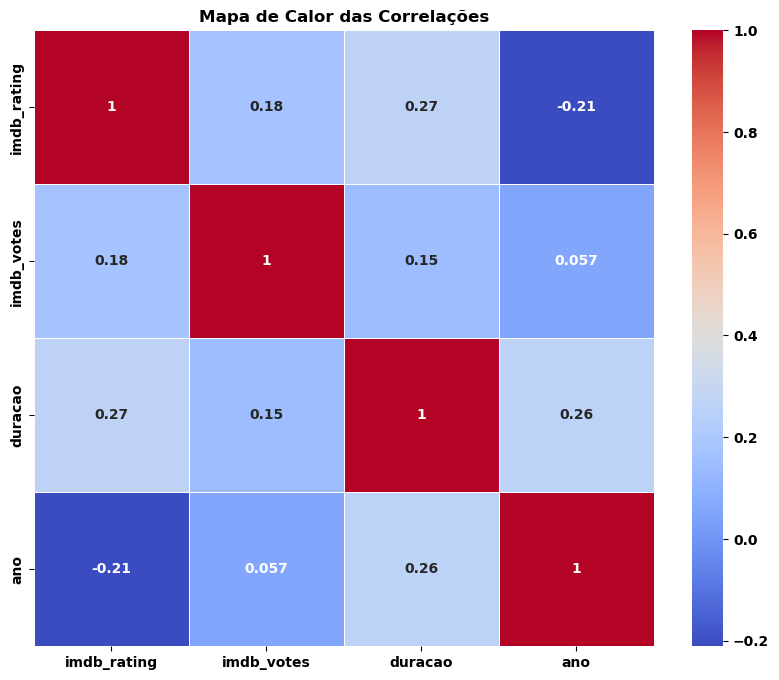

In [10]:
# Calculando a matriz de correlação
correlacao = df[['imdb_rating', 'imdb_votes', 'duracao', 'ano']].corr()

# Criando um mapa de calor para visualizar as correlações
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Mapa de Calor das Correlações")
plt.show()

**Insights Gerais**:
- Os filmes que possuem uma quantidade maior de votos no IMDb tendem a ter classificações ligeiramente mais altas, o que pode indicar uma combinação de popularidade e qualidade.
- Há uma tendência leve, mas notável, de filmes mais longos receberem classificações mais altas. Isso pode refletir uma preferência por tramas mais detalhadas ou desenvolvidas.
- Filmes mais recentes têm uma ligeira tendência de receber classificações mais baixas. Pode ser interessante investigar se isso é um reflexo de mudanças nas expectativas do público ou outras dinâmicas da indústria cinematográfica.
- O aumento gradual na duração dos filmes ao longo do tempo pode ser reflexo de mudanças nas convenções cinematográficas, tecnologias de produção ou preferências do público.

Essas observações, embora baseadas em correlações fraca a moderada, fornecem insights úteis sobre as tendências e relações nos dados. No entanto, é importante lembrar que correlação não implica causalidade, e uma análise mais aprofundada seria necessária para fazer afirmações definitivas.

## Classificação IMDb X Ano de lançamento

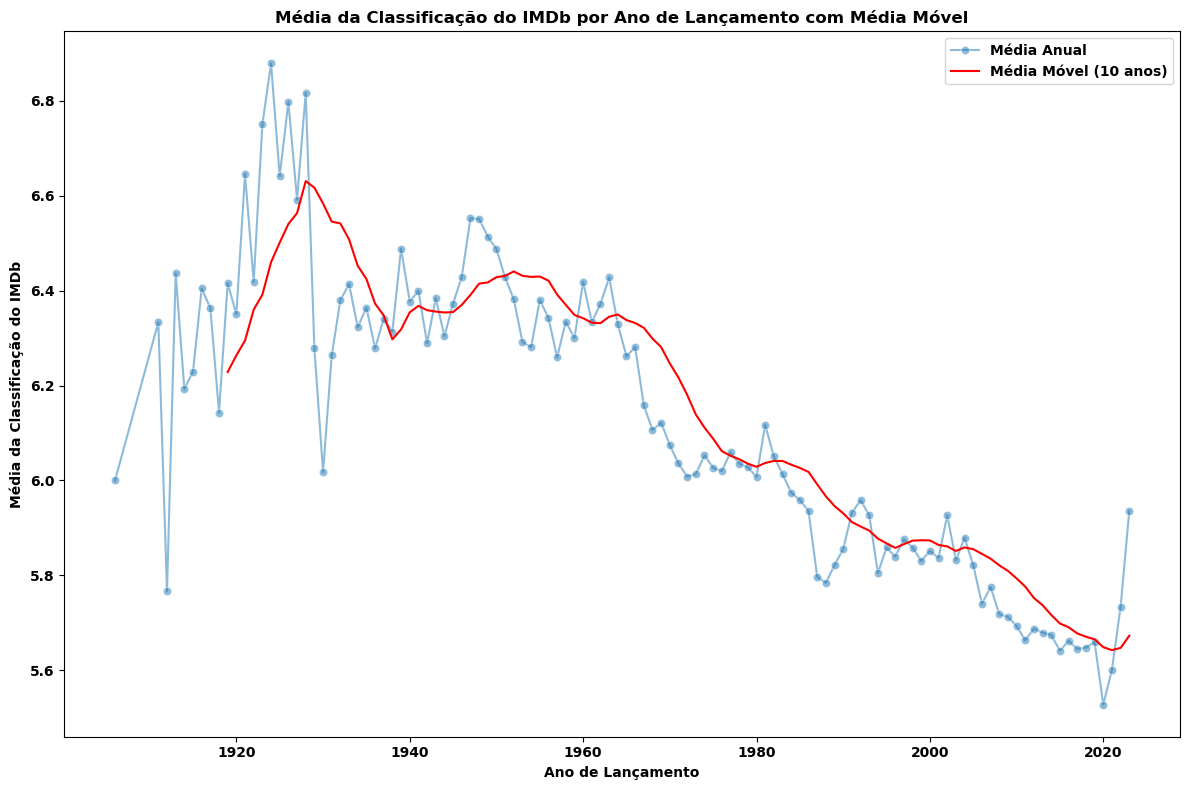

In [11]:
# Calculando a média da classificação do IMDb para cada ano de lançamento
avg_rating_per_year = df.groupby('ano')['imdb_rating'].mean().reset_index()

# Aplicando uma média móvel com uma janela de 10 anos para suavizar o gráfico
avg_rating_per_year['moving_avg'] = avg_rating_per_year['imdb_rating'].rolling(window=10).mean()

# Gráfico de linha com média móvel
plt.figure(figsize=(12, 8))
sns.lineplot(x='ano', y='imdb_rating', data=avg_rating_per_year, label='Média Anual', marker='o', alpha=0.5)
sns.lineplot(x='ano', y='moving_avg', data=avg_rating_per_year, label='Média Móvel (10 anos)', color='red')
plt.title('Média da Classificação do IMDb por Ano de Lançamento com Média Móvel')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Média da Classificação do IMDb')
plt.legend()
plt.tight_layout()
plt.show()


**Insights Gerais**:

**Era de Ouro do Cinema**: Filmes lançados antes de 1960 tendem a ter uma média de classificação mais alta. Isso pode refletir o "efeito de nostalgia", onde filmes mais antigos são vistos como clássicos e, consequentemente, recebem classificações mais altas. Outra possibilidade é que somente os melhores filmes daquela época tenham perdurado e sejam mais amplamente reconhecidos, enquanto filmes menos memoráveis tenham sido esquecidos.

**Decadência após os anos 1960**: Há um declínio perceptível nas médias das classificações a partir dos anos 1960. A democratização do cinema e da crítica pode ter ampliado a diversidade de avaliações, resultando em médias mais baixas. Além disso, o aumento na quantidade de filmes produzidos pode ter contribuído para essa queda, com uma diluição da qualidade média.

**Ressurgimento Recente**: A média das classificações mostra uma ligeira recuperação nos anos mais recentes (2021-2023). Isso pode ser o resultado de uma mudança nas avaliações ou uma melhoria na qualidade dos filmes. A pandemia de COVID-19 também pode ter desempenhado um papel, influenciando tanto a produção quanto a percepção dos filmes durante esse período.

**Flutuações em Filmes Anteriores a 1960**: Filmes anteriores a 1960 apresentam flutuações notáveis nas médias anuais. Devido ao menor número de filmes desses anos presentes no conjunto de dados, as médias são mais sensíveis a avaliações extremas, resultando em variações mais pronunciadas.

Estes insights proporcionam uma visão abrangente das tendências nas avaliações de filmes ao longo dos anos, destacando períodos de destaque e mudanças notáveis na percepção do público.

## Duração x Ano de Lançamento

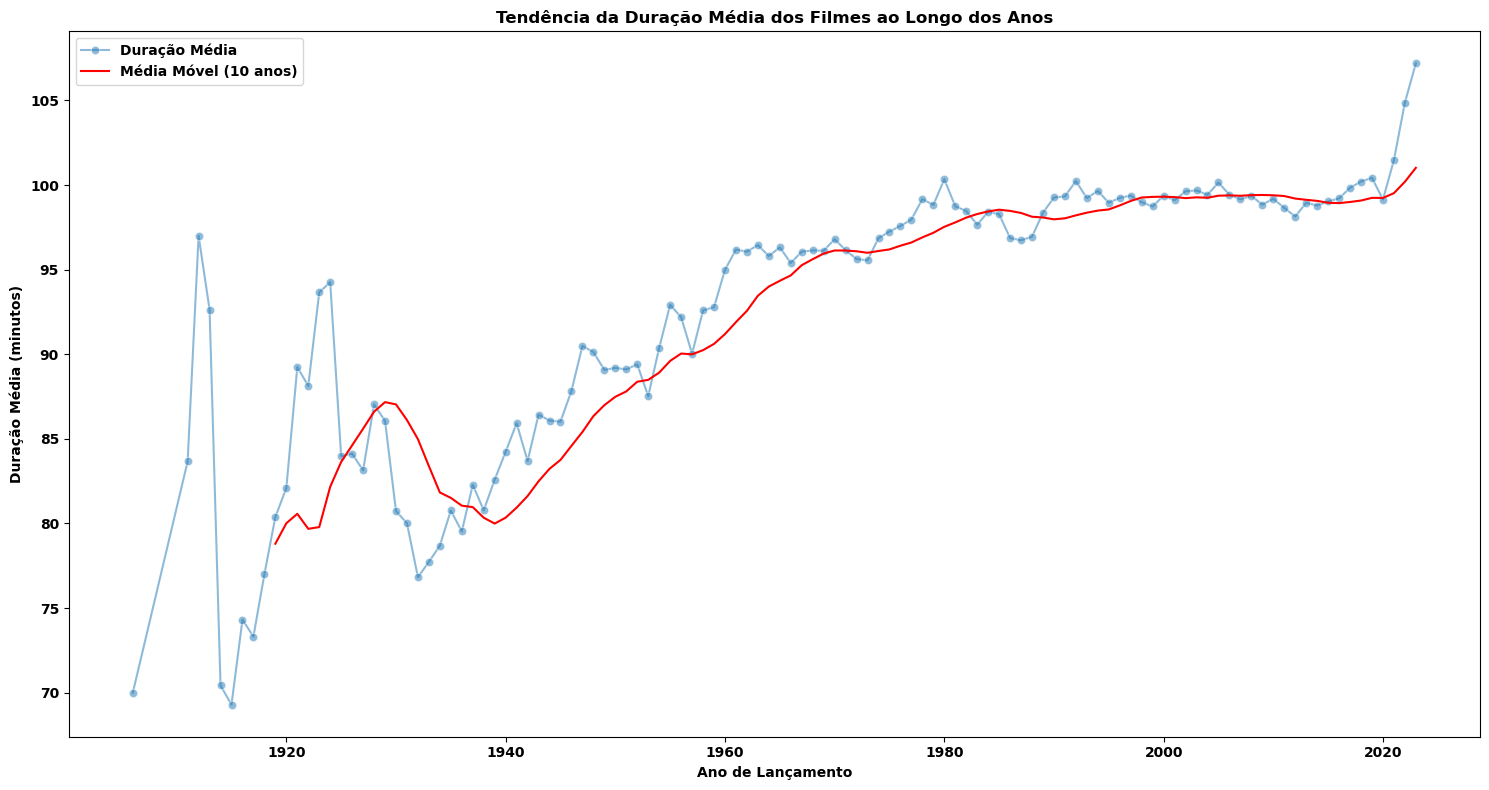

In [12]:
# Primeiro, vamos agrupar os dados por 'ano' e calcular a média da 'duracao'
df_grouped_by_year = df.groupby('ano')['duracao'].mean().reset_index()

# Adicionando a média móvel ao gráfico para suavizar as flutuações e facilitar a identificação de tendências
df_grouped_by_year['duracao_media_movel'] = df_grouped_by_year['duracao'].rolling(window=10).mean()

# Plotar o gráfico com a média móvel
plt.figure(figsize=(15, 8))
sns.lineplot(x='ano', y='duracao', data=df_grouped_by_year, label='Duração Média', marker='o', alpha=0.5)
sns.lineplot(x='ano', y='duracao_media_movel', data=df_grouped_by_year, label='Média Móvel (10 anos)', color='red')
plt.title('Tendência da Duração Média dos Filmes ao Longo dos Anos')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Duração Média (minutos)')
plt.legend()
plt.tight_layout()
plt.show()

**Insights Gerais Sobre a Duração dos Filmes:**

**Era dos Filmes Curtos**: Nos primórdios do cinema, especialmente em torno de 1920, os filmes eram consideravelmente mais curtos, com uma média de duração de cerca de 52 minutos. Isso provavelmente reflete as limitações tecnológicas e de produção da época, restringindo a extensão dos filmes.

**Ascensão da Narrativa Cinematográfica**: Há um aumento progressivo na duração dos filmes do final dos anos 1920 até meados dos anos 1970, atingindo uma média de 100 minutos. Este fenômeno pode ser o resultado do amadurecimento da indústria cinematográfica, com tramas mais complexas e produções mais ambiciosas exigindo mais tempo de tela.

**Norma da Indústria**: Após o aumento sustentado, a duração média dos filmes estabiliza-se, oscilando levemente em torno de 100 minutos por várias décadas até os anos 2020. Isso indica a consolidação de uma norma industrial quanto ao tempo de duração "ideal" de um filme, equilibrando a necessidade de desenvolvimento narrativo com as preferências do público.

**Era de Experiências Cinematográficas Expansivas**: A partir de 2021, nota-se um aumento na duração média dos filmes, sugerindo uma mudança nas preferências tanto dos criadores quanto dos espectadores. Inicialmente impulsionado pelo contexto da pandemia, que pode ter favorecido conteúdos mais longos para públicos confinados, este aumento na duração dos filmes parece se sustentar além desse período. Isso pode refletir um interesse crescente em experiências cinematográficas mais imersivas e detalhadas.

**A "Duração Ideal"**: Em média, ao longo dos anos, os filmes tendem a durar cerca de 102 minutos. Esta "duração ideal" ressoa com a expectativa do público e se adapta a uma ampla variedade de gêneros e narrativas, demonstrando que, independentemente das tendências temporais, existe uma preferência consistente que molda a produção cinematográfica.

## Gêneros primários x Classificação do IMDb

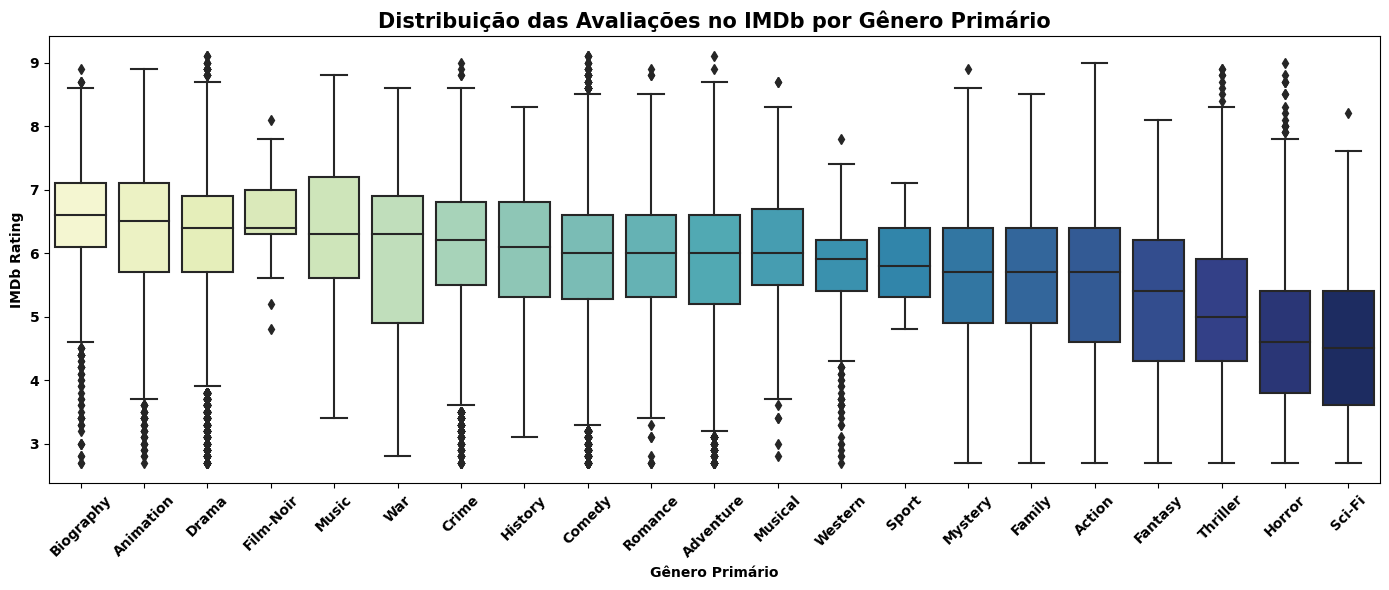

In [13]:
# Calculando a mediana das avaliações para cada gênero
median_colors = df.groupby('genero_primario')['imdb_rating'].median().sort_values(ascending=False)

# Criando um mapa de cores baseado nas medianas
color_palette = sns.color_palette("YlGnBu", n_colors=len(median_colors))
color_map = dict(zip(median_colors.index, color_palette))

# Plotando o boxplot com as cores ajustadas
plt.figure(figsize=(14, 6))
sns.boxplot(x="genero_primario", y="imdb_rating", data=df, palette=color_map, order=median_colors.index)

# Configurando o gráfico
plt.title("Distribuição das Avaliações no IMDb por Gênero Primário", fontsize=15)
plt.xlabel("Gênero Primário")
plt.ylabel("IMDb Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Gêneros Mais Altamente Avaliados**:
- **Biografia**: Com uma mediana de 6.6, o gênero biografia se destaca como o mais bem avaliado, refletindo a apreciação do público por histórias baseadas em eventos e personalidades reais.
- **Animação**: Com uma mediana de 6.5, este gênero demonstra uma forte preferência, especialmente considerando que animações muitas vezes atraem públicos de todas as idades.
- **Drama**: Consistindo no maior número de filmes, o gênero drama tem uma mediana de 6.4, o que é um testemunho de sua popularidade e aceitação ampla pelo público.

**Gêneros Menos Favorecidos**:
- **Terror**: Apesar de ser um gênero popular com um grande número de filmes, o terror tem uma mediana de 4.6, indicando que o público deste gênero é bastante quanto à qualidade do filme.
- **Sci-Fi**: Com uma mediana de 4.5, o gênero de ficção científica, embora possa ter um seguimento cult, tem uma média de classificação relativamente baixa.
  
**Intervalo de Variações Dentro dos Gêneros**:
A variação dentro dos gêneros, como indicado pelos quartis, mostra que enquanto alguns gêneros têm avaliações consistentemente altas ou baixas, outros, como **Guerra** e **Ação**, têm uma ampla gama de avaliações, como indicado pelo tamanho do box plot. Isso indica que a qualidade dos filmes desses gêneros são mais suscetíveis a serem influenciadas por outros fatores do que, por exemplo, o gênero **Biografia** que, apesar de ter avaliações diversificadas, tem notas consistentemente mais altas e dentro de um intervalo menor.

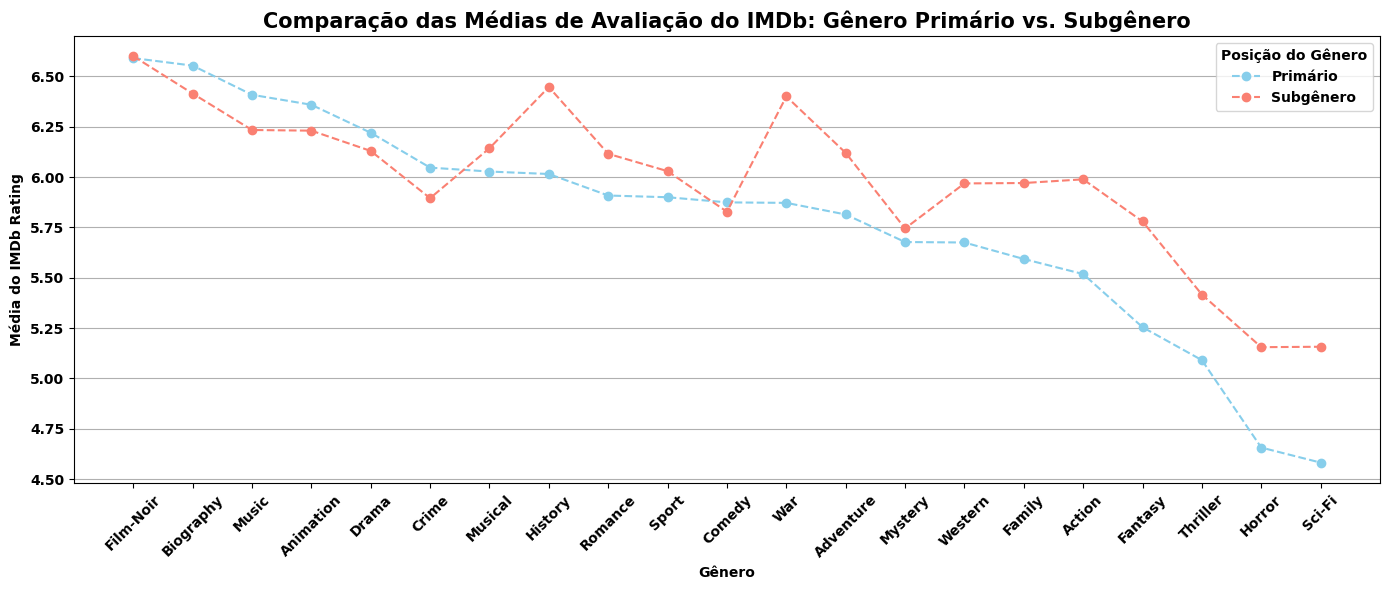

In [14]:
# Criando um DataFrame para armazenar as médias das avaliações para cada gênero quando ele é primário e subgênero
genre_comparison = pd.DataFrame(index=df['genero_primario'].unique())

# Calculando as médias das avaliações para cada gênero como primário
genre_comparison['primary'] = df.groupby('genero_primario')['imdb_rating'].mean()

# Calculando as médias das avaliações para cada gênero como secundário e terciário
genre_comparison['subgenre'] = (df.groupby('genero_secundario')['imdb_rating'].mean() +
                                df.groupby('genero_terciario')['imdb_rating'].mean()) / 2

# Removendo NaNs (caso algum gênero não apareça como subgênero)
genre_comparison = genre_comparison.dropna()

# Ordenando os valores para a visualização
genre_comparison = genre_comparison.sort_values(by='primary', ascending=False)

# Criando um gráfico de linhas para comparar as médias das avaliações dos gêneros como primários e subgêneros
plt.figure(figsize=(14, 6))
plt.plot(genre_comparison.index, genre_comparison['primary'], marker='o', label='Primário', color='skyblue', linestyle='dashed')
plt.plot(genre_comparison.index, genre_comparison['subgenre'], marker='o', label='Subgênero', color='salmon', linestyle='dashed')

# Configurando o gráfico
plt.title('Comparação das Médias de Avaliação do IMDb: Gênero Primário vs. Subgênero', fontsize=15)
plt.ylabel('Média do IMDb Rating')
plt.xlabel('Gênero')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Posição do Gênero')
plt.grid(axis='y')

# Exibindo o gráfico
plt.show()


**Insights Gerais**

**Realce através do Subgênero**: De modo geral, um gênero frequentemente obtém avaliações mais altas quando é integrado como subgênero. Isso sugere que a introdução de determinados temas ou estilos cinematográficos como elementos complementares pode realçar a narrativa principal, tornando-a mais envolvente para o público.

**O Poder da Combinação**: Gêneros como **História**, **Guerra**, **Ação** e **Aventura** exemplificam essa tendência. Quando posicionados como gêneros principais, podem não ter o mesmo impacto no público. No entanto, ao serem introduzidos como subgêneros, enriquecendo a narrativa principal de outro gênero, a reação do público tende a ser mais favorável.

**Exceções Notáveis**: Contudo, há gêneros que desafiam essa tendência geral. **Musical**, **Drama** e **Crime**, por exemplo, tendem a ser mais bem avaliados quando são o gênero principal do filme. Isso destaca sua força intrínseca e a capacidade de se manterem como pilares narrativos centrais, sem a necessidade de serem complementados por outros gêneros.

**A Arte da Narrativa Cinematográfica**: Esses padrões sublinham a versatilidade e a complexidade da narrativa cinematográfica. A habilidade de mesclar e harmonizar gêneros pode criar experiências mais imersivas, enquanto certos gêneros retêm sua força e apelo, independentemente de sua posição na estrutura da história.

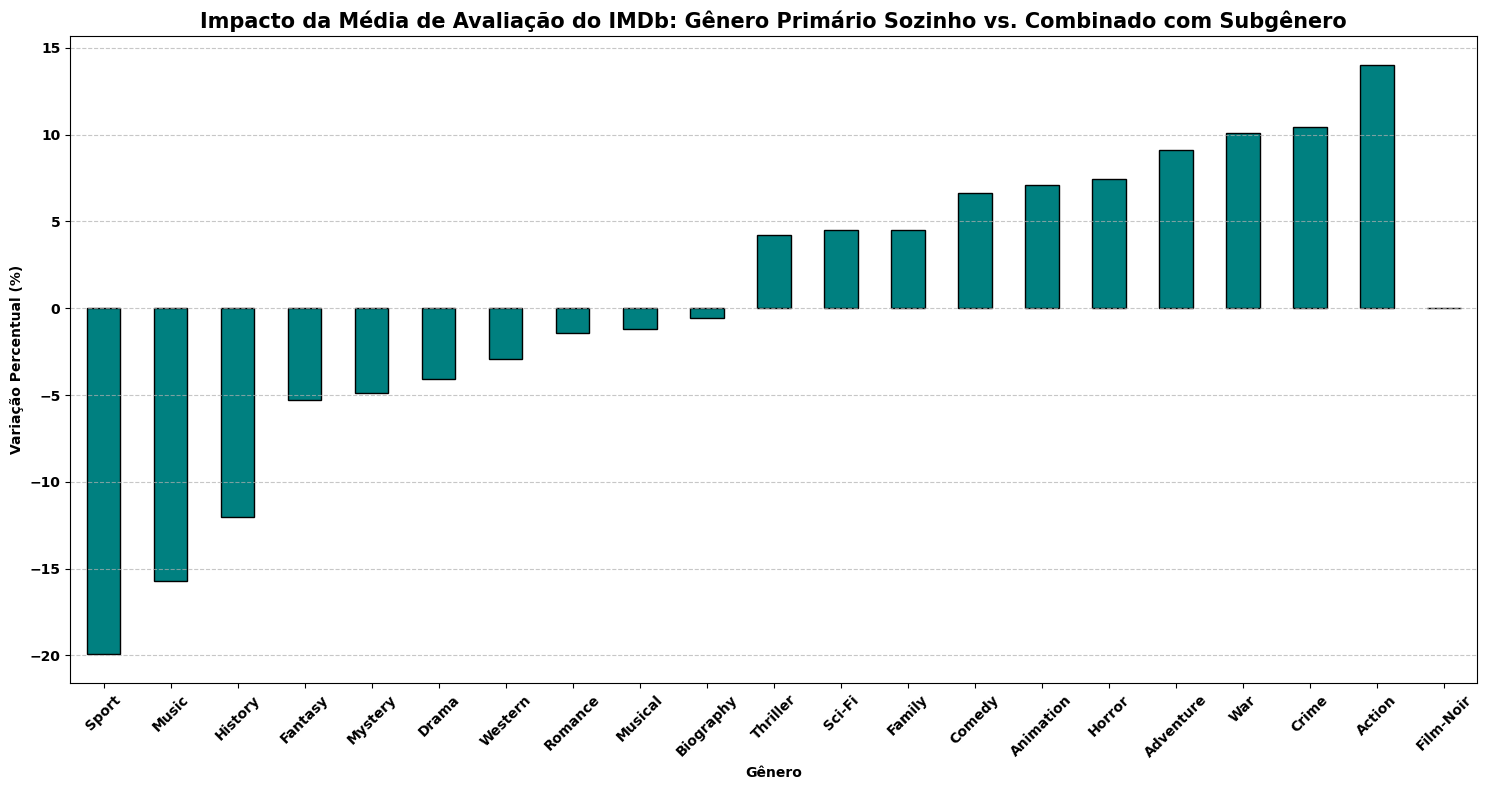

In [20]:
# Calculando a média de avaliação para cada gênero primário quando ele aparece sozinho
solo_genre_df = df[df['genero_secundario'].isna() & df['genero_terciario'].isna()]
solo_primary_avg = solo_genre_df.groupby('genero_primario')['imdb_rating'].mean()

# Calculando a média de avaliação para cada gênero primário quando combinado com qualquer subgênero
combined_genre_df = df.dropna(subset=['genero_secundario', 'genero_terciario'], how='all')
combined_primary_avg = combined_genre_df.groupby('genero_primario')['imdb_rating'].mean()

# Calculando a variação percentual
percentage_variation = ((combined_primary_avg - solo_primary_avg) / solo_primary_avg) * 100

# Configuração do gráfico
plt.figure(figsize=(15, 8))
percentage_variation.sort_values().plot(kind='bar', color='teal', edgecolor='black')

# Configurações adicionais do gráfico
plt.title('Impacto da Média de Avaliação do IMDb: Gênero Primário Sozinho vs. Combinado com Subgênero', fontsize=15)
plt.ylabel('Variação Percentual (%)')
plt.xlabel('Gênero')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibindo o gráfico
plt.show()

**Interpretação de Gêneros Tradicionalmente "Puros"**: Gêneros como "Esporte", "Music" e "História" têm uma queda significativa em suas avaliações quando combinados com outros subgêneros. Isso pode sugerir que o público prefere uma abordagem mais "pura" ou tradicional para esses tipos de filmes. Por exemplo, os espectadores podem preferir filmes esportivos que se concentram estritamente em esportes, sem a introdução de elementos de outros gêneros.

**Versatilidade de Gêneros Populares**: Gêneros como "Ação", "Crime" e "Guerra" experimentam um aumento nas avaliações quando combinados com outros gêneros. Isso indica que a inclusão de elementos de outros gêneros pode enriquecer a narrativa ou tornar o filme mais dinâmico e interessante para o público. Por exemplo, um filme de ação com elementos de mistério ou romance pode ser mais envolvente do que um filme de ação puro.

**Neutralidade de Certos Gêneros**: Gêneros como "Biografia", "Romance" e "Musical" mostram variações mínimas, sugerindo que a combinação com outros subgêneros não tem um impacto significativo nas avaliações. Isso pode indicar que a essência desses gêneros permanece intacta, independentemente da introdução de elementos de outros gêneros.

**Implicações para Produtores e Diretores**: Ao decidir o gênero e a narrativa de um filme, os cineastas podem considerar essas tendências. Se estiverem produzindo um filme esportivo, por exemplo, pode ser benéfico manter-se fiel ao gênero. Por outro lado, se estiverem se aventurando em um filme de ação, a introdução de subgêneros pode ser uma boa estratégia.

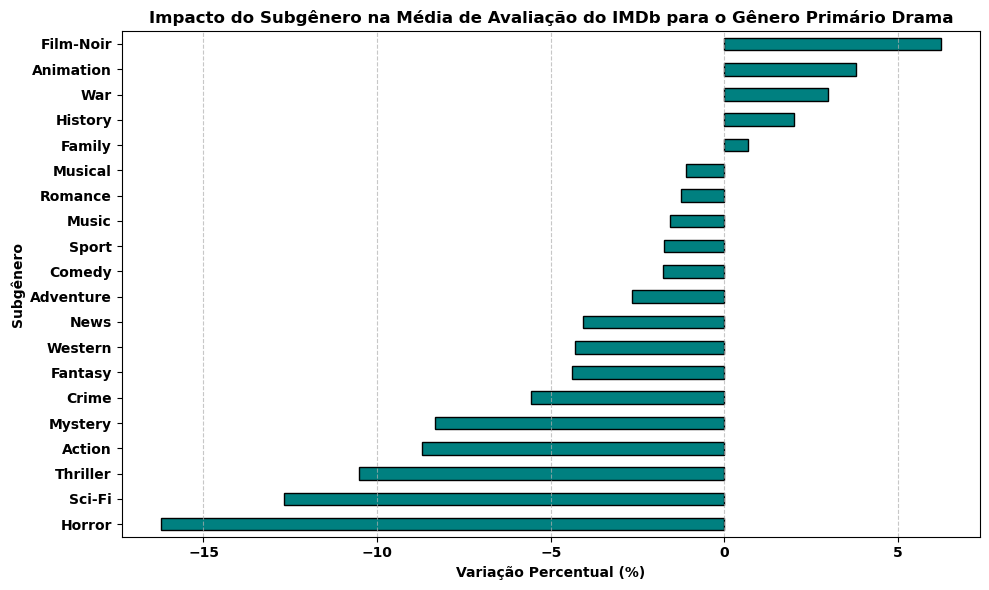

In [11]:
def analyze_genre(primary_genre):
    """
    Esta função recebe um gênero primário e retorna a variação percentual 
    que cada subgênero (considerando secundário e terciário) pode causar 
    na média de avaliação do IMDb para o gênero primário inserido.
    """
    # Calculando a média de avaliação para o gênero primário quando ele aparece sozinho
    solo_genre_df = df[df['genero_secundario'].isna() & df['genero_terciario'].isna()]
    solo_primary_avg = solo_genre_df.groupby('genero_primario')['imdb_rating'].mean().get(primary_genre, None)
    
    # Obtendo as avaliações para o gênero primário quando combinado com subgêneros
    combined_genre_df = df[df['genero_primario'] == primary_genre]
    
    # Extraindo subgêneros e avaliações em uma lista
    subgenres = combined_genre_df['genero_secundario'].tolist() + combined_genre_df['genero_terciario'].tolist()
    ratings = combined_genre_df['imdb_rating'].tolist() + combined_genre_df['imdb_rating'].tolist()

    # Criando um DataFrame com subgêneros e avaliações
    combined_df = pd.DataFrame({'subgenero': subgenres, 'imdb_rating': ratings}).dropna()
    
    # Calculando a média de avaliação para cada subgênero
    subgenre_avg = combined_df.groupby('subgenero')['imdb_rating'].mean()
    
    # Calculando a variação percentual para cada subgênero
    if solo_primary_avg:
        percentage_variation = ((subgenre_avg - solo_primary_avg) / solo_primary_avg) * 100
    else:
        percentage_variation = None
    
    results = pd.DataFrame({'subgenero': subgenre_avg.index, 'percentage_variation': percentage_variation.values})
    
    return results

def visualize_genre(primary_genre):
    results = analyze_genre(primary_genre)
    
    # Configuração do gráfico
    plt.figure(figsize=(10, 6))
    results.sort_values('percentage_variation').set_index('subgenero')['percentage_variation'].plot(kind='barh', color='teal', edgecolor='black')

    # Configurações adicionais do gráfico
    plt.title(f'Impacto do Subgênero na Média de Avaliação do IMDb para o Gênero Primário {primary_genre}')
    plt.xlabel('Variação Percentual (%)')
    plt.ylabel('Subgênero')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Exibindo o gráfico
    plt.show()

# Executando a função
visualize_genre("Drama")

**Ferramenta de Decisão para Cineastas**: O script é extremamente útil para cineastas que desejam entender o impacto de combinar diferentes subgêneros com um gênero primário. Ao visualizar a variação percentual, os cineastas podem tomar decisões informadas sobre quais subgêneros introduzir em um filme para potencialmente aumentar sua popularidade e avaliação.

**Evitando Combinações Desfavoráveis**: Da mesma forma, ao identificar subgêneros que podem diminuir a avaliação média, os cineastas podem optar por evitar certas combinações ou abordar a narrativa de uma maneira que neutralize possíveis rejeições.

**Flexibilidade e Customização**: O script oferece flexibilidade, pois permite que os usuários escolham qualquer gênero primário e visualizem o impacto dos subgêneros. Isso é valioso porque os cineastas podem adaptar sua abordagem com base no gênero específico de filme que estão produzindo.

# Gêneros primários x Ano de lançamento

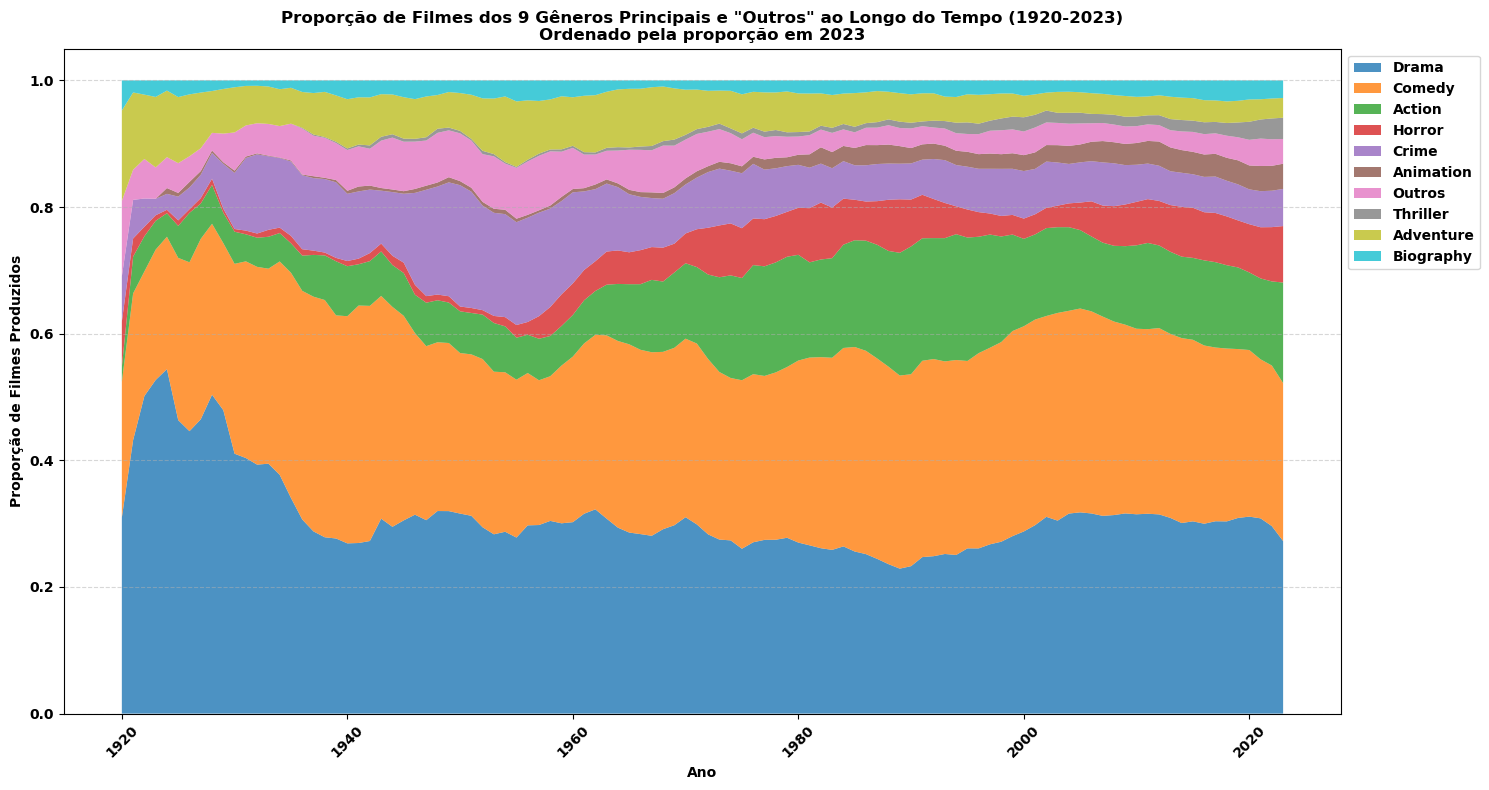

In [31]:
# Filtrando os dados para incluir apenas anos a partir de 1920
df = df[df['ano'] >= 1920]

# Identificando os 9 gêneros mais comuns
generos_mais_comuns_9 = df['genero_primario'].value_counts().head(9).index

# Criando uma nova coluna que contém o nome do gênero se ele estiver entre os 9 mais frequentes, e "Outros" caso contrário
df['genero_agrupado'] = df['genero_primario'].where(df['genero_primario'].isin(generos_mais_comuns_9), 'Outros')

# Agrupando os dados por ano e gênero agrupado e contando o número de filmes
filmes_por_genero_ano_agrupados = df.groupby(['ano', 'genero_agrupado']).size().unstack(fill_value=0)

# Calculando a proporção de filmes de cada gênero em relação ao total em cada ano
proporcao_filmes_genero_agrupados = filmes_por_genero_ano_agrupados.div(filmes_por_genero_ano_agrupados.sum(axis=1), axis=0)

# Aplicando a suavização exponencial para suavizar as linhas
proporcao_filmes_genero_suavizada_exp = proporcao_filmes_genero_agrupados.ewm(span=5).mean()

# Verificando o ano mais recente nos dados
ano_mais_recente = df['ano'].max()

# Reordenando as colunas pela proporção dos gêneros no ano mais recente com dados
colunas_ordenadas = proporcao_filmes_genero_suavizada_exp.loc[ano_mais_recente].sort_values(ascending=False).index

# Definindo uma paleta de cores
paleta_cores = sns.color_palette("tab10", n_colors=10)  # Agora temos 10 cores, pois incluímos a categoria "Outros"

# Criando um gráfico de área empilhada para visualizar a proporção dos gêneros ao longo do tempo
plt.figure(figsize=(15, 8))
plt.stackplot(proporcao_filmes_genero_suavizada_exp.index, 
              proporcao_filmes_genero_suavizada_exp[colunas_ordenadas].T, 
              labels=colunas_ordenadas, 
              colors=paleta_cores, 
              alpha=0.8)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title(f'Proporção de Filmes dos 9 Gêneros Principais e "Outros" ao Longo do Tempo (1920-{ano_mais_recente})\nOrdenado pela proporção em {ano_mais_recente}')
plt.xlabel('Ano')
plt.ylabel('Proporção de Filmes Produzidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5, axis='y')
plt.show()


C:\Users\renan\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\renan\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


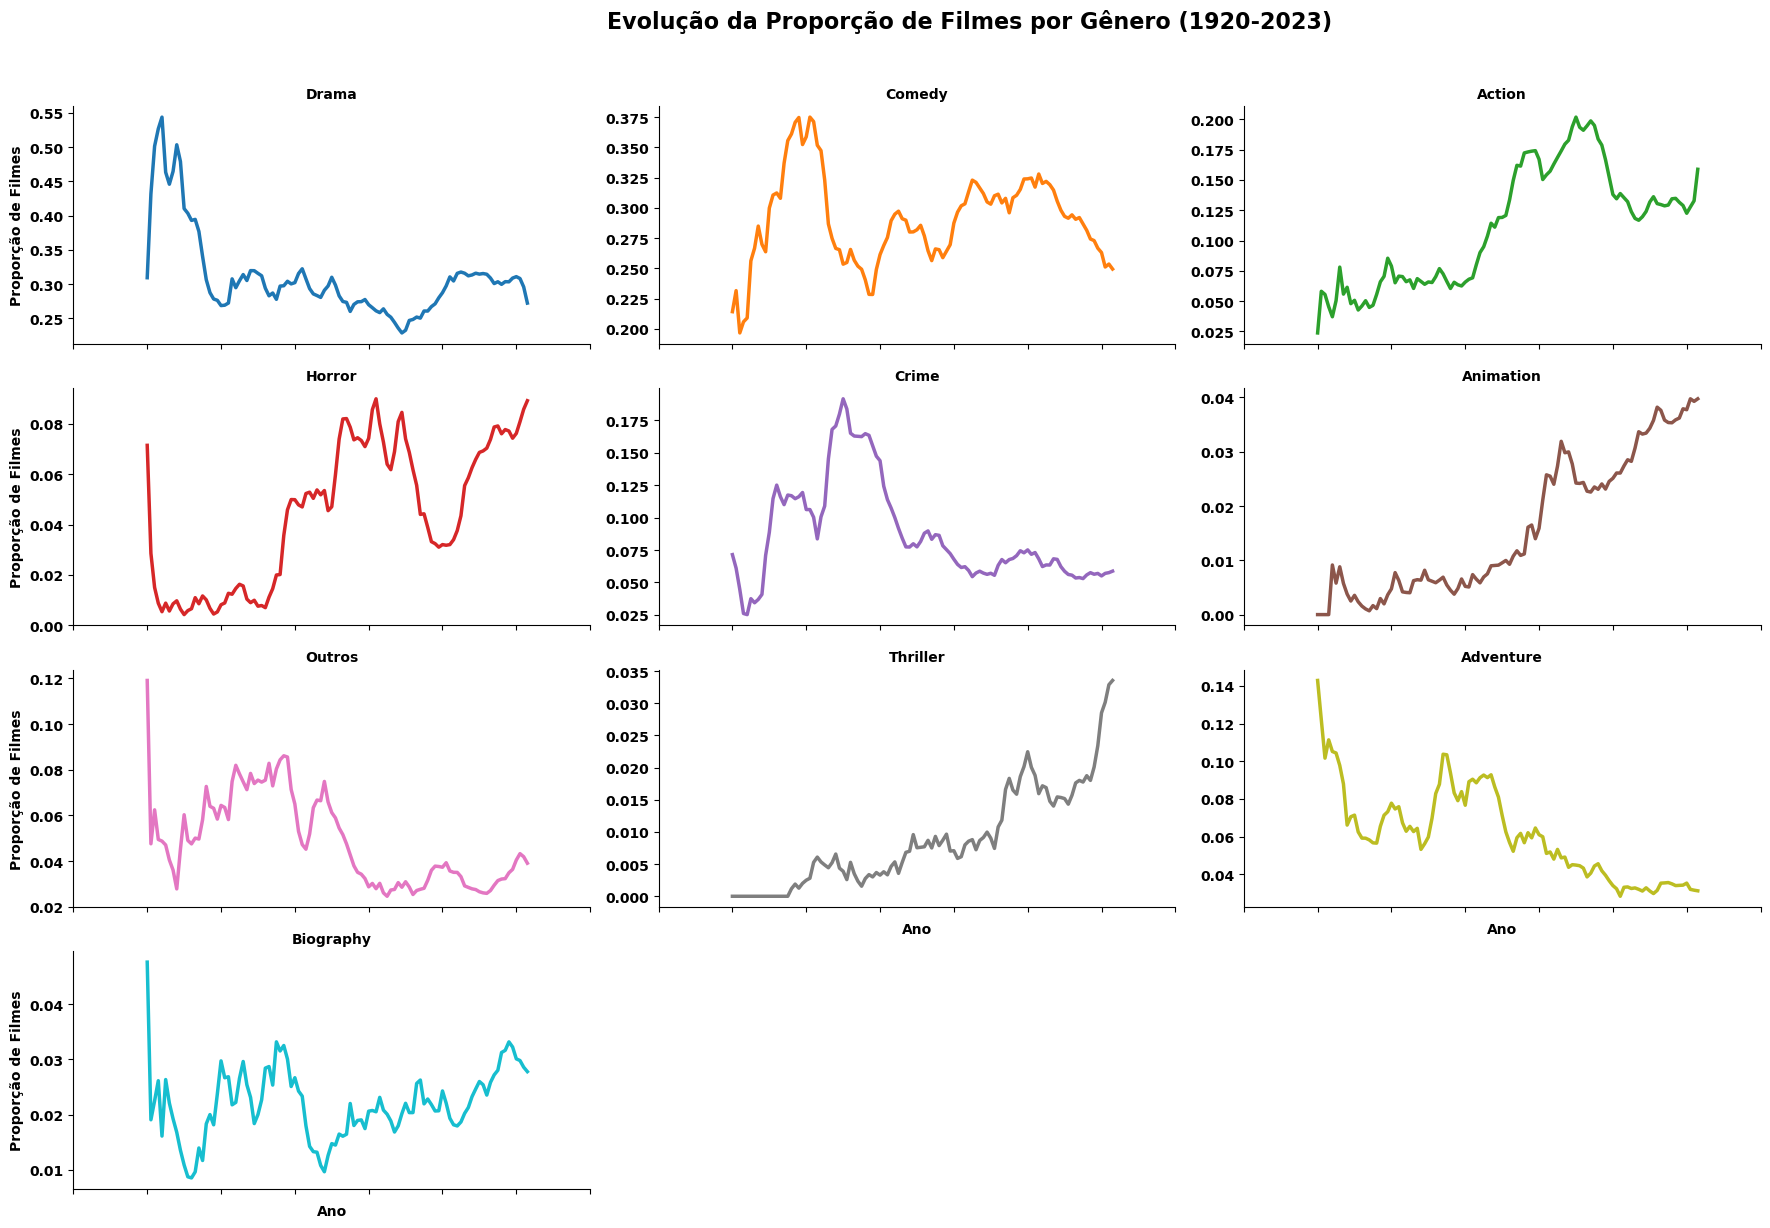

In [32]:
# Mapeando cada gênero para uma cor específica com base na ordem fornecida
ordem_generos = ['Drama', 'Comedy', 'Action', 'Horror', 'Crime', 'Animation', 'Outros', 'Thriller', 'Adventure', 'Biography']
mapeamento_cores = dict(zip(ordem_generos, paleta_cores))

# Plotando a análise temporal facetada com a ordem dos gêneros ajustada
g = sns.relplot(data=proporcao_filmes_genero_suavizada_exp.reset_index().melt(id_vars='ano', value_name='proporcao'), 
                x='ano', y='proporcao', hue='genero_agrupado', palette=mapeamento_cores, kind='line',
                col='genero_agrupado', col_wrap=3, height=3, aspect=2, linewidth=2.5, facet_kws=dict(sharey=False),
                col_order=colunas_ordenadas)  # Utilizando a ordem dos gêneros especificada

# Ajustando os títulos e labels
g.fig.suptitle('Evolução da Proporção de Filmes por Gênero (1920-2023)', size=16, y=1.02)
g.set_titles("{col_name}")
g.set_axis_labels("Ano", "Proporção de Filmes")
g.set_xticklabels(rotation=45)
g.tight_layout()

# Removendo a legenda, pois o nome do gênero já está no título de cada subgráfico
g._legend.remove()

# Exibir o gráfico
plt.show()

# Subgêneros x Ano de lançamento

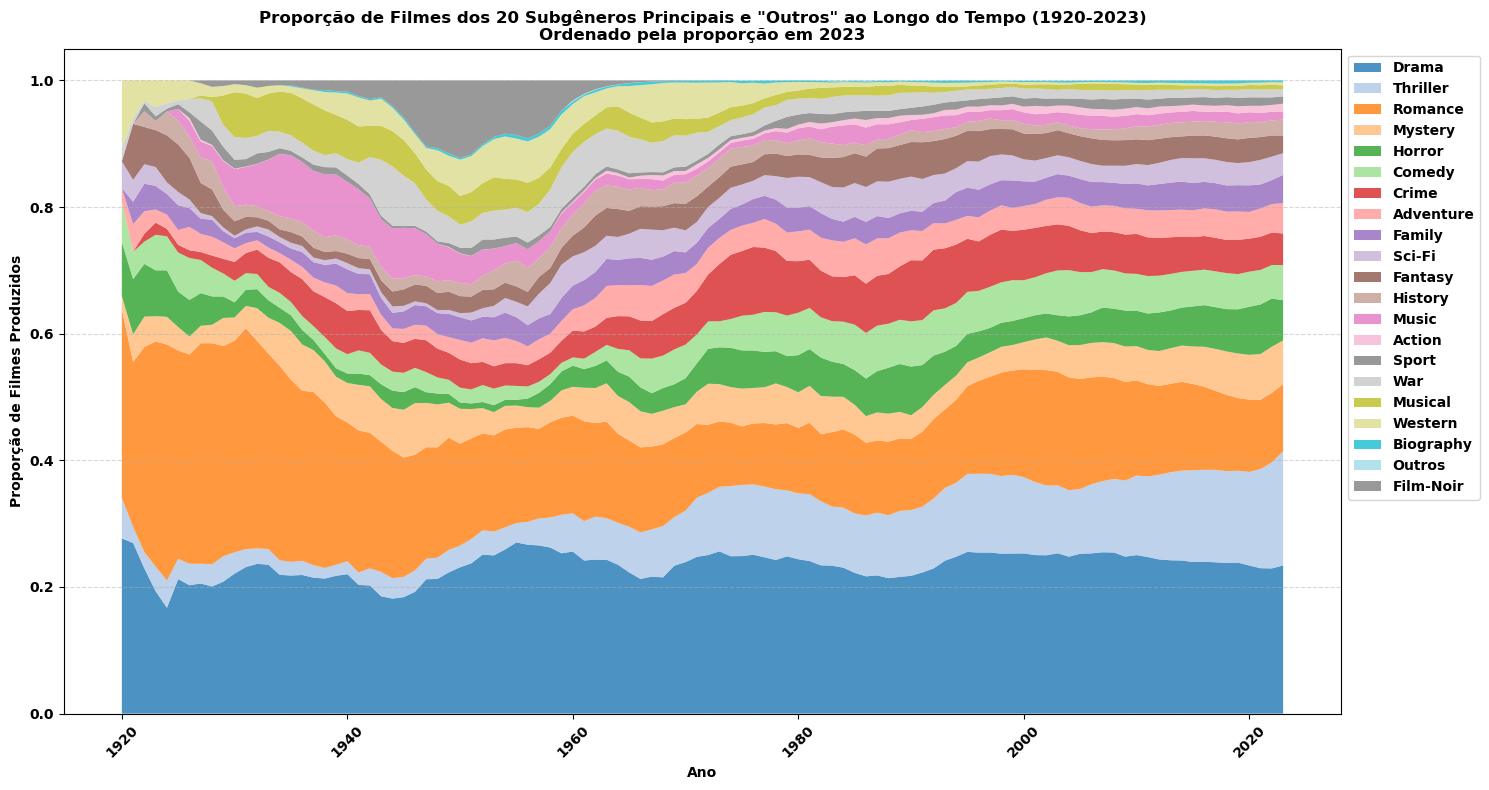

In [17]:
# Criando um DataFrame que considera múltiplos subgêneros sem duplicatas
subgeneros_expandidos = df[['ano', 'genero_secundario', 'genero_terciario']].melt(id_vars='ano', value_name='subgenero').dropna().drop(columns='variable')

# Identificando os 20 subgêneros mais comuns
top_20_subgeneros = subgeneros_expandidos['subgenero'].value_counts().head(20).index

# Criando uma nova coluna que contém o nome do subgênero se ele estiver entre os 20 mais frequentes, e "Outros" caso contrário
subgeneros_expandidos['subgenero_agrupado'] = subgeneros_expandidos['subgenero'].where(subgeneros_expandidos['subgenero'].isin(top_20_subgeneros), 'Outros')

# Agrupando os dados por ano e subgênero agrupado e contando o número de filmes
filmes_por_subgenero_ano_agrupados = subgeneros_expandidos.groupby(['ano', 'subgenero_agrupado']).size().unstack(fill_value=0)

# Calculando a proporção de filmes de cada subgênero em relação ao total em cada ano
proporcao_filmes_subgenero_agrupados = filmes_por_subgenero_ano_agrupados.div(filmes_por_subgenero_ano_agrupados.sum(axis=1), axis=0)

# Aplicando a suavização exponencial para suavizar as linhas
proporcao_filmes_subgenero_suavizada_exp = proporcao_filmes_subgenero_agrupados.ewm(span=5).mean()

# Verificando o ano mais recente nos dados
ano_mais_recente_subgenero = subgeneros_expandidos['ano'].max()

# Reordenando as colunas pela proporção dos subgêneros no ano mais recente com dados
colunas_ordenadas_subgenero = proporcao_filmes_subgenero_suavizada_exp.loc[ano_mais_recente_subgenero].sort_values(ascending=False).index

# Definindo uma paleta de cores
paleta_cores_subgeneros = sns.color_palette("tab20", n_colors=20)  # 20 cores para os subgêneros mais comuns
paleta_cores_subgeneros.append("#808080")  # Adicionando cinza para a categoria "Outros"

# Criando um gráfico de área empilhada para visualizar a proporção dos subgêneros ao longo do tempo
plt.figure(figsize=(15, 8))
plt.stackplot(proporcao_filmes_subgenero_suavizada_exp.index, 
              proporcao_filmes_subgenero_suavizada_exp[colunas_ordenadas_subgenero].T, 
              labels=colunas_ordenadas_subgenero, 
              colors=paleta_cores_subgeneros, 
              alpha=0.8)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title(f'Proporção de Filmes dos 20 Subgêneros Principais e "Outros" ao Longo do Tempo (1920-{ano_mais_recente_subgenero})\nOrdenado pela proporção em {ano_mais_recente_subgenero}')
plt.xlabel('Ano')
plt.ylabel('Proporção de Filmes Produzidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5, axis='y')
plt.show()

C:\Users\renan\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\renan\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


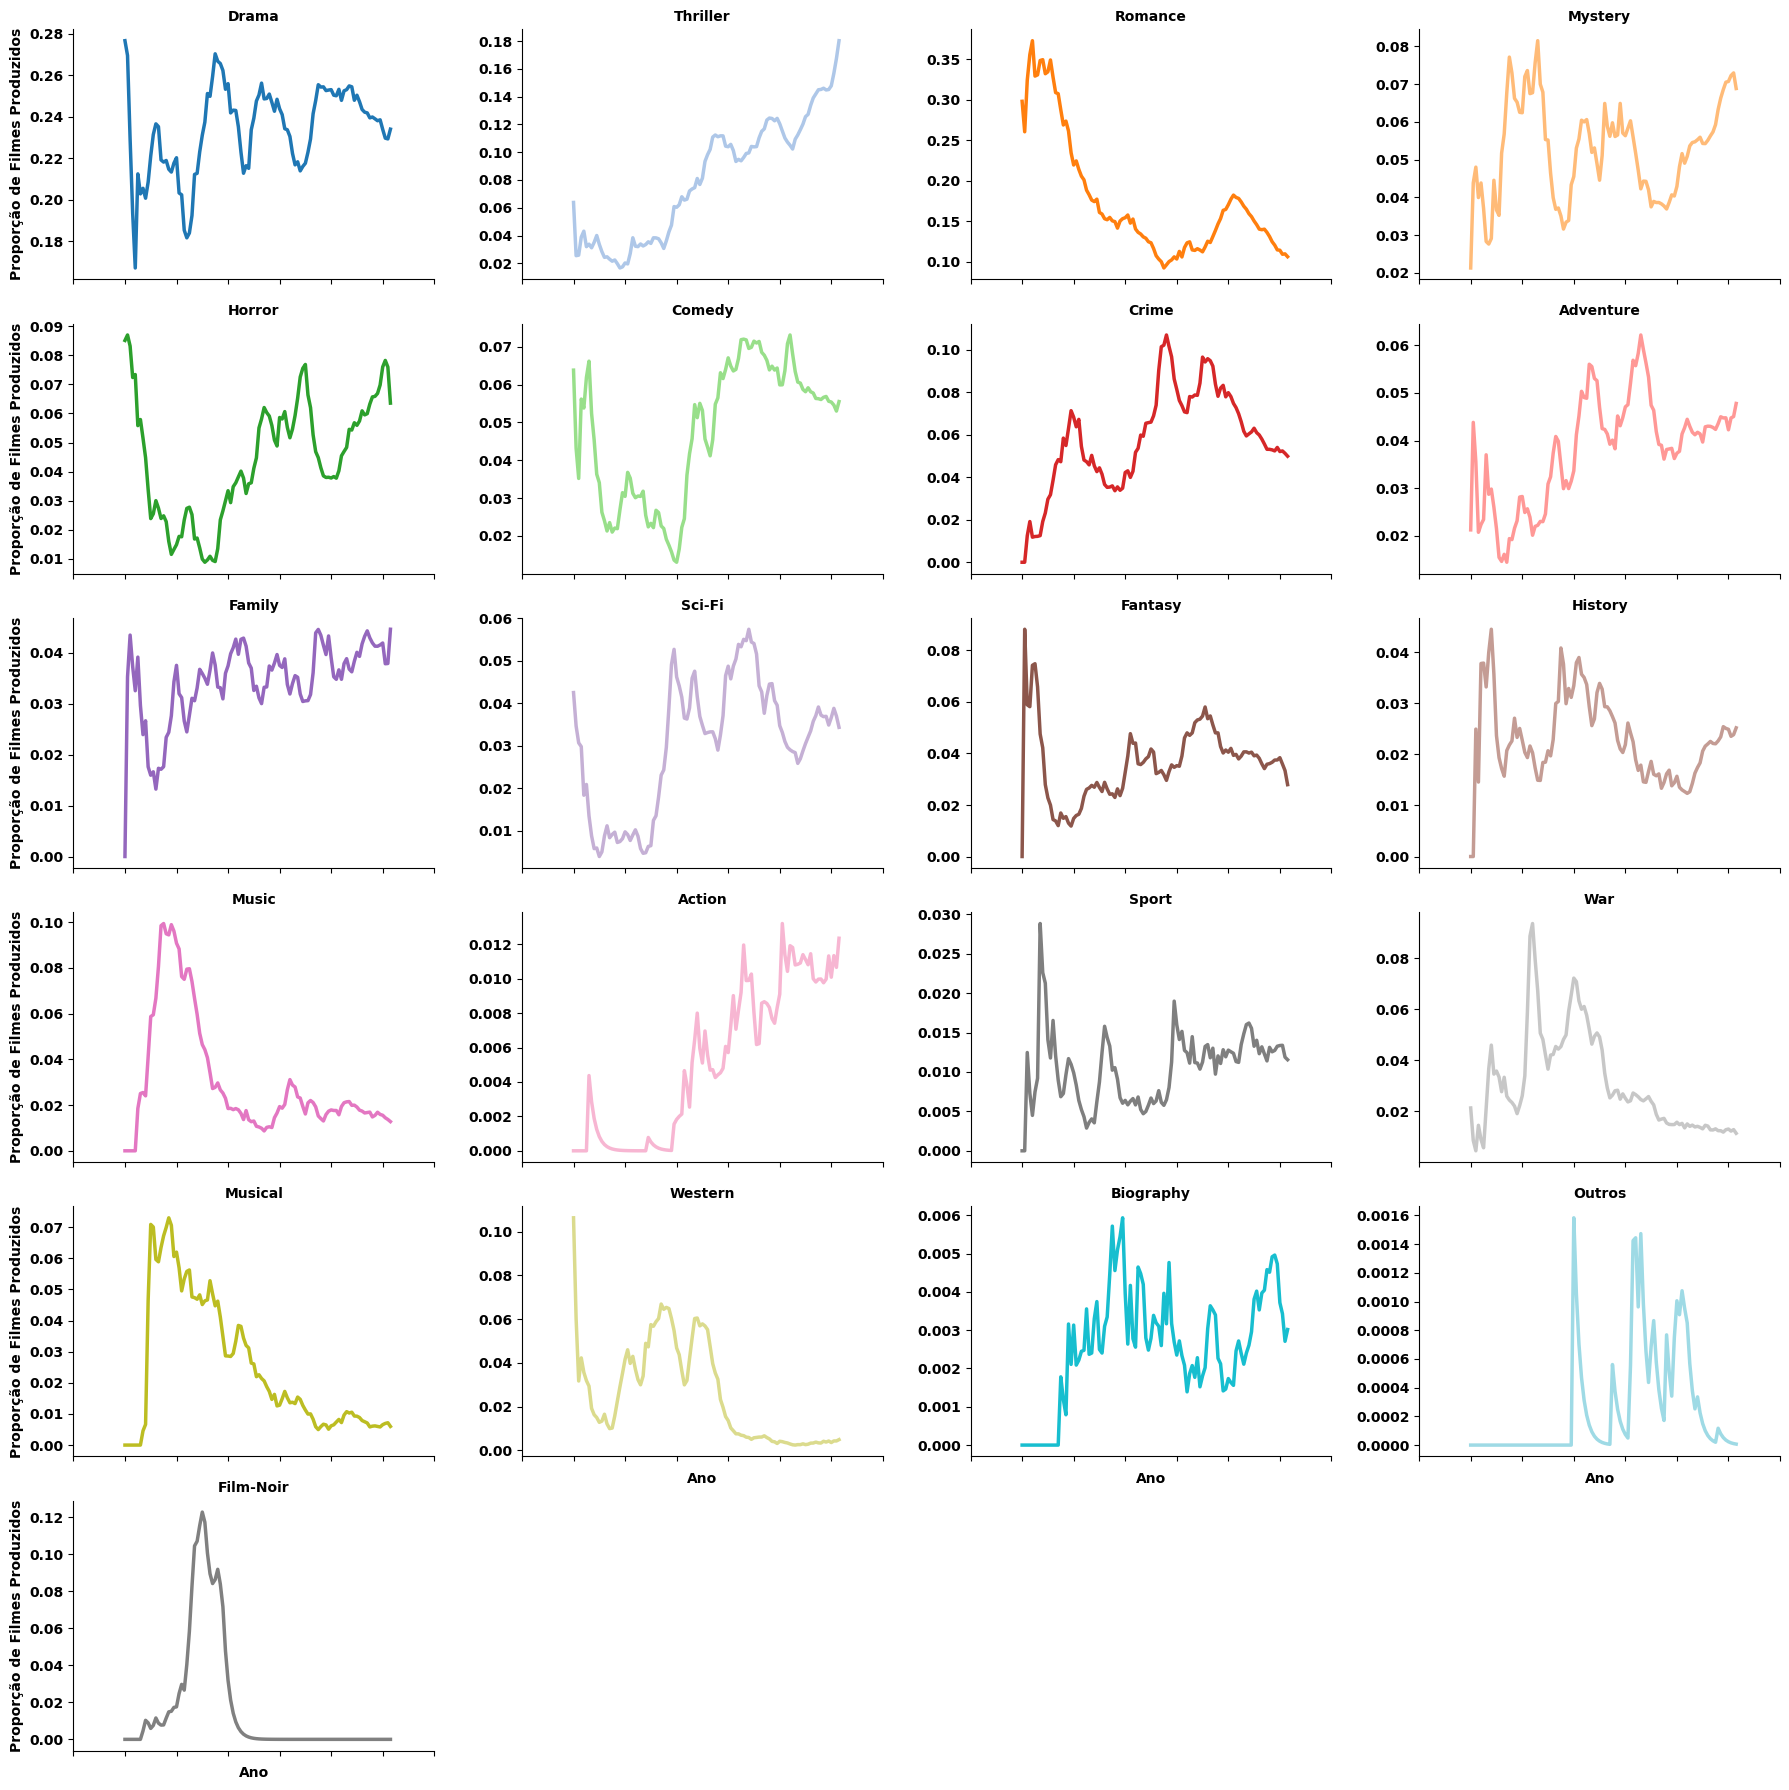

In [22]:
# Mapeando cada subgênero para uma cor específica com base na paleta fornecida
mapeamento_cores_subgeneros = dict(zip(colunas_ordenadas_subgenero, paleta_cores_subgeneros))

# Criando gráficos facetados para cada subgênero com cores corrigidas e sem legenda
g = sns.relplot(
    data=proporcao_filmes_subgenero_suavizada_exp.reset_index().melt(id_vars='ano', value_name='proporcao', var_name='subgenero'),
    x='ano', y='proporcao', hue='subgenero', col='subgenero', col_order=colunas_ordenadas_subgenero,
    kind='line', col_wrap=4, facet_kws=dict(sharey=False), palette=mapeamento_cores_subgeneros,
    linewidth=2.5, aspect=1.5, height=3, legend=False
)

# Ajustando os títulos e labels dos eixos
g.set_titles("{col_name}")
g.set_axis_labels("Ano", "Proporção de Filmes Produzidos")
g.set_xticklabels(rotation=45)
g.tight_layout()
plt.show()



**Prevalência de Drama**: A análise mostra que o gênero Drama mantém uma presença dominante ao longo dos anos, tanto como gênero primário quanto subgênero. Esta observação indica uma preferência contínua por narrativas dramáticas, talvez devido à sua capacidade universal de ressonância com experiências humanas mais profundas.

**Evolução dos Gêneros Primários**: Há um aumento notável na produção de filmes de "Animação", que pode ser correlacionado com avanços tecnológicos e a alta aceitação do público para esse gênero. Gêneros como "Ação" e "Thriller" também mostram um crescimento, o que pode ser interpretado como uma preferência por tramas mais intensas e dinâmicas.

**Evolução dos Subgêneros**: O subgênero "Thriller" apresenta um crescimento expressivo, passando de 4% para 18% em proporção nos últimos 100 anos. Isso pode refletir um interesse crescente por tramas complexas e tensas. Já o subgênero "Mistério" mostra uma curva em forma de "U", sugerindo uma ressurgência após um período de declínio, possivelmente devido a um renovado interesse em enigmas e mistérios. Vale ressaltar que os dois subgêneros se complementam muito bem, o que comprova que essa popularidade observada é verdadeira.

**Tendências de baixa**: Alguns gêneros primários, como "Aventura" e "Crime", demonstram uma queda na sua proporção ao longo dos anos. Isso pode ser um indicativo de saturação da indústria ou mudanças nas preferências do público. Entre os subgêneros, "Romance", "Music", "Musical" e "Guerra" mostram uma tendência de baixa, possivelmente refletindo uma procura por narrativas mais contemporâneas e menos idealizadas.

**Planejamento de Produção**: Essas observações são valiosas para produtores e estúdios na tomada de decisões estratégicas. A análise das tendências pode orientar investimentos em gêneros em ascensão ou na exploração de nichos menos saturados, oferecendo oportunidades para inovação e diferenciação.

**Decisões de Roteiro**: Para roteiristas, entender as tendências de gênero é fundamental. A popularidade crescente de gêneros como "Thriller" e "Mistério" pode incentivá-los a desenvolver histórias que se alinhem com essas preferências, ao mesmo tempo em que exploram novas formas de revitalizar gêneros em declínio.

# Classificação do IMDb x Diretor

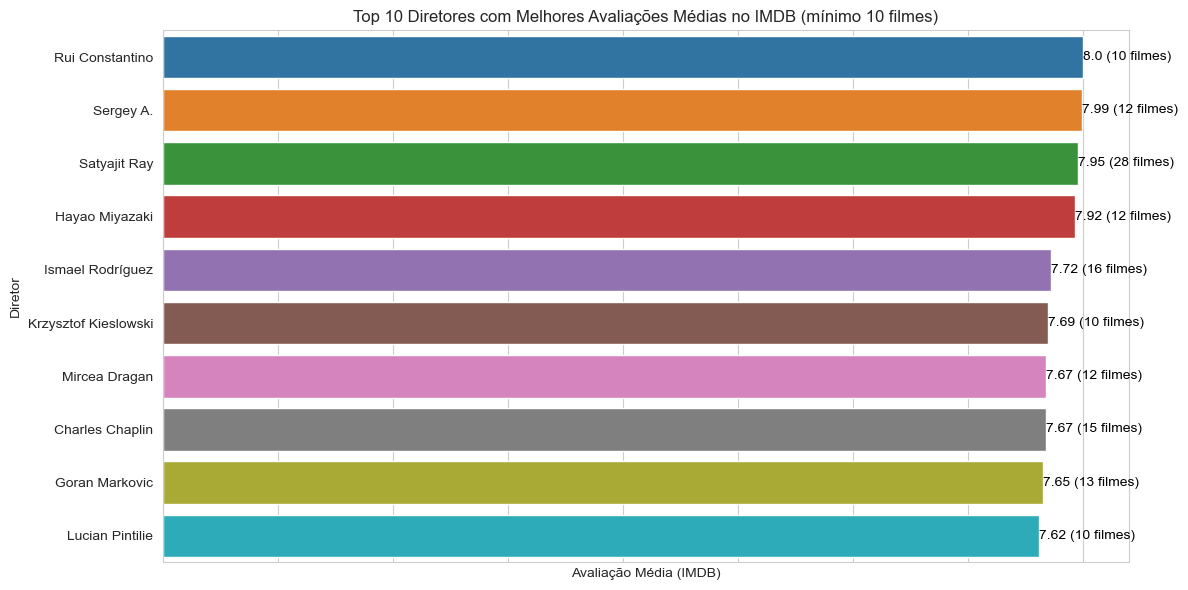

In [6]:
# Calculando a média de avaliação e a contagem de filmes para cada diretor
avg_rating_por_diretor = df.groupby('diretor')['imdb_rating'].agg(['mean', 'count']).reset_index()

# Filtrando diretores que têm no mínimo 10 filmes
diretores_min_10_filmes = avg_rating_por_diretor[avg_rating_por_diretor['count'] >= 10]

# Ordenando os diretores pela avaliação média em ordem decrescente e pegando os top diretores
top_diretores = diretores_min_10_filmes.sort_values(by='mean', ascending=False).head(10)

# Definindo o estilo dos gráficos
sns.set_style("whitegrid")

# Criando um gráfico de barras para os top diretores baseado apenas na avaliação média e número de filmes
plt.figure(figsize=(12, 6))
sns.barplot(data=top_diretores, x='mean', y='diretor', palette="tab10")
plt.title('Top 10 Diretores com Melhores Avaliações Médias no IMDB (mínimo 10 filmes)')
plt.xlabel('Avaliação Média (IMDB)')
plt.ylabel('Diretor')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Removendo a numeração no eixo x

# Adicionando o número de filmes na barra
for index, value in enumerate(top_diretores['mean']):
    plt.text(value, index, f"{round(value, 2)} ({top_diretores['count'].iloc[index]} filmes)", color='black', va="center")

# Ajustando o layout e mostrando o gráfico
plt.tight_layout()
plt.show()


In [7]:
# Filtrando o dataframe original para incluir apenas filmes dos top 10 diretores
top_diretores_nomes = top_diretores['diretor'].tolist()
df_top_diretores = df[df['diretor'].isin(top_diretores_nomes)]

# Função para calcular a porcentagem de filmes de cada gênero primário para cada diretor
def calc_porcentagem_generos_primarios(df, diretores):
    resultado = []
    for diretor in diretores:
        # Filtrando os filmes do diretor
        filmes_diretor = df[df['diretor'] == diretor]
        
        # Contando a frequência de cada gênero primário
        generos_primarios_count = filmes_diretor['genero_primario'].value_counts()
        
        # Calculando a porcentagem
        generos_primarios_porcentagem = (generos_primarios_count / generos_primarios_count.sum()) * 100
        
        # Adicionando ao resultado
        resultado.append({'diretor': diretor, 'generos_primarios_porcentagem': generos_primarios_porcentagem})
    
    return resultado

# Calculando as porcentagens de gêneros primários para cada um dos top 10 diretores
generos_primarios_por_diretor = calc_porcentagem_generos_primarios(df_top_diretores, top_diretores_nomes)

# Exibindo os resultados
for item in generos_primarios_por_diretor:
    print(f"Diretor: {item['diretor']}")
    print(item['generos_primarios_porcentagem'])
    print("-" * 40)

Diretor: Rui Constantino
genero_primario
Action    100.0
Name: count, dtype: float64
----------------------------------------
Diretor: Sergey A.
genero_primario
Horror       50.000000
Action       16.666667
Fantasy       8.333333
Drama         8.333333
Adventure     8.333333
Sci-Fi        8.333333
Name: count, dtype: float64
----------------------------------------
Diretor: Satyajit Ray
genero_primario
Drama        67.857143
Comedy       17.857143
Adventure    10.714286
Crime         3.571429
Name: count, dtype: float64
----------------------------------------
Diretor: Hayao Miyazaki
genero_primario
Animation    100.0
Name: count, dtype: float64
----------------------------------------
Diretor: Ismael Rodríguez
genero_primario
Comedy       50.00
Drama        43.75
Adventure     6.25
Name: count, dtype: float64
----------------------------------------
Diretor: Krzysztof Kieslowski
genero_primario
Drama     70.0
Comedy    20.0
Crime     10.0
Name: count, dtype: float64
------------------

**Influência do Gênero nas Avaliações:** Embora certos gêneros possam ter uma média de avaliação geralmente mais baixa ou mais alta, os top diretores demonstram que a qualidade da direção pode superar as expectativas do gênero. Por exemplo, Sergey A. se destaca com filmes de terror altamente avaliados, apesar do gênero ser conhecido por ter uma média de avaliação menor. Isso sugere que a habilidade e o talento do diretor podem elevar a percepção e a recepção de gêneros geralmente menos valorizados.

**Especialização de Gênero:** Muitos dos top diretores mostram uma clara especialização em certos gêneros. Hayao Miyazaki é renomado por seus filmes de animação, enquanto Charles Chaplin é inconfundível no gênero comédia. Essa especialização indica uma afinidade e maestria em contar histórias dentro de um espectro particular, o que pode ser um fator-chave em suas altas avaliações.

**Diversidade de Portfólios:** Enquanto alguns diretores se destacam em gêneros específicos, outros, como Satyajit Ray e Ismael Rodríguez, mostram uma diversidade impressionante em seus portfólios. Isso reflete uma versatilidade na direção e a capacidade de contar histórias em vários contextos e estilos, o que pode ser atraente para um público mais amplo e contribuir para uma maior média de avaliação.

**Inspiração e Aprendizado:** Os top diretores servem como fonte de inspiração para cineastas emergentes e estabelecidos. Estudar suas filmografias, abordagens narrativas e técnicas de direção pode oferecer insights valiosos sobre o que torna seus filmes bem-sucedidos. Por exemplo, a forma como Hayao Miyazaki infunde elementos culturais japoneses em suas animações ou a habilidade de Krzysztof Kieslowski em tecer elementos de romance e drama podem servir de inspiração para diretores que buscam aprimorar sua própria arte.

**Reconhecimento além da Fama:** Os dados revelam que a fama e o reconhecimento de um diretor não são sempre sinônimos de avaliações altas. Diretores como Rui Constantino, que podem não ser amplamente conhecidos pelo público mainstream, ainda assim alcançam altas avaliações, demonstrando que a qualidade do trabalho pode se destacar independentemente da fama. Isso destaca a importância de olhar além dos nomes mais reconhecidos da indústria e valorizar o talento onde quer que ele seja encontrado.

**Planejamento de Produção e Descoberta de Talentos:** A análise das especializações dos diretores pode ser uma ferramenta valiosa para a indústria cinematográfica. Investir em diretores com sucesso comprovado em gêneros específicos pode alavancar tendências de mercado e preferências do público. Além disso, a identificação de diretores menos conhecidos, como Rui Constantino, pode revelar talentos ocultos. A consideração de diretores menos conhecidos, mas altamente avaliados, pode ser uma estratégia lucrativa, visto que muitos deles podem não ter orçamento para criar filmes possibilidades de emplacar.


# Exploratory Data Analysis (EDA) of Films

## Contexto do Negócio 💼

A indústria cinematográfica é uma das mais vibrantes e influentes globalmente, afetando não apenas a economia, mas também a cultura e a sociedade. Com milhares de filmes lançados a cada ano, profissionais da indústria, pesquisadores e entusiastas do cinema buscam constantemente entender as tendências, preferências do público e fatores que contribuem para o sucesso de um filme.

## Objetivo 🎯

O objetivo principal deste projeto é coletar, tratar e analisar dados sobre filmes de diversas épocas e gêneros para gerar insights que possam ser úteis para profissionais da indústria, pesquisadores ou entusiastas do cinema.

## Lista de Tópicos 📌

- Visão Geral
- Ferramentas e tecnologias utilizadas
- Coleta de Dados
- Limpeza e Pré-Processamento de Dados
- Análise Exploratória de Dados (EDA) e visualizações
- Conclusões

## Visão Geral
Ao longo desse README, estão somente as análises e explicações mais importantes. Os códigos e procedimentos estão mais detalhados no Jupyter Notebook, assim como análises adicionais menos importantes, ou seja, que não geraram insights significativos. O notebook pode ser encontrado neste repositório.

### Etapa 1: Coleta de dados:
Gerar funções que interajam com a API OMDb para coletar de forma automatizada um conjunto de dados abrangente de filmes.

### Etapa 2: Limpeza e pré-processamento dos dados:
Empregar métodos de limpeza de dados e pré-processamento para garantir que o conjunto de dados esteja em um estado ideal para análise. Isso inclui tratamento de valores ausentes e transformações dos dados, assim como a identificação e remoção de outliers.

### Etapa 3: Análise exploratória de dados (EDA) e visualizações:
Implementar uma análise exploratória abrangente, utilizando estatísticas descritivas e técnicas de análise de dados para identificar padrões, tendências e possíveis correlações nos dados. Partindo de análises unidimensionais até bidimensionais. Assim como, criar uma série de visualizações de dados impactantes e informativas que complementem e aprimorem os insights gerados durante a fase de análise exploratória.

### Etapa 4: Conclusões:
Com base na análise exploratória de dados e nas visualizações, sintetizar os principais insights e descobertas obtidos a partir do conjunto de dados e sugerir áreas de pesquisa e análise futuras que podem ser exploradas para aprofundar o entendimento sobre o tema e gerar novos insights.

## Ferramentas e Tecnologias Utilizadas

- **Python**: Linguagem de programação principal do projeto.
- **Pandas**: Biblioteca do Python para manipulação e análise de dados.
- **Requests**: Ferramenta utilizada para realizar requisições HTTP à API OMDb durante o processo de coleta de dados.
- **Matplotlib e Seaborn**: Bibliotecas do Python para visualização de dados.

## Coleta de Dados

- A coleta de dados foi realizada em duas etapas: inicialmente, coletamos os ID's dos filmes que queremos obter os dados. Estes IDs são então utilizados como parâmetros para solicitações à API OMDb, a fim de obter o conjunto de dados.
  
- A seleção de filmes para esta análise foi restrita àqueles que receberam um mínimo de 150 avaliações de usuários. Este critério foi estabelecido para garantir que as notas dos filmes sejam confiáveis e representativas da percepção geral do público sobre um determinado filme.

- O limite de 150 avaliações serve como um ponto de equilíbrio: é alto o suficiente para conferir credibilidade às notas, mas baixo o suficiente para evitar a introdução de um viés de popularidade. Isso permite que filmes menos conhecidos, mas ainda bem avaliados, sejam inclusos na análise, oferecendo um panorama mais abrangente do cenário cinematográfico.

- Foram definidas funções específicas para a coleta. A amostra bruta de dados ficou com um total de 94.785 filmes.

## Limpeza e Pré-Processamento de Dados

Nessa etapa foi utilizado principalmente o Pandas para limpeza e transformação dos dados. As principais ações realizadas foram:
- Verificação e remoção de dados faltantes: Valores nulos e inclusive dados N/A em forma de string;
- Verificação e remoção de duplicatas;
- Verificação e conversão dos tipos dos dados;
- Transformação da coluna gêneros: Essa coluna estava preenchida como uma lista, podendo variar até 3 gêneros em cada linha do dataset. Foi aplicada uma transformação para separar essa coluna em 3 colunas distintas (gênero primário, secundário e terciário).
- Detecção de Outliers: Foi utilizado o método interquartil (IQR) para detectar os outliers das colunas `imdb_rating` e `duracao` e os resultados foram 1526 outliers para a coluna `imdb_rating` e 5753 para a coluna `duracao`. Os outliers foram então filtrados do dataset, visto que eles podem distorcer os resultados e afetar a qualidade das análises estatísticas. Para manter a integridade do estudo, os dados dos outliers foram salvos em um arquivo separado. Isso permitirá uma análise mais aprofundada no futuro, caso seja necessário.

## Conjunto de dados 📊

O conjunto de dados após a limpeza e transformações ficou da seguinte forma:

| Coluna             | Tipo     | Descrição                                       |
|--------------------|----------|-------------------------------------------------|
| `titulo`           | `object` | Título do filme                                 |
| `ano`              | `int64`  | Ano que o filme foi lançado                     |
| `imdb_rating`      | `float64`| Classificação do IMDb (nota dada pelos usuários)|
| `imdb_votes`       | `int64`  | Número de votos dados pelos usuários do site    |
| `duracao`          | `float64`| Duração do filme em minutos                     |
| `diretor`          | `object` | Diretor responsável pelo filme                  |
| `genero_primario`  | `object` | Gênero principal do filme                       |
| `genero_secundario`| `object` | Subgênero secundário do filme                   |
| `genero_terciario` | `object` | Subgênero terciário do filme                    |


Após inspeções qualitativas, foi possível constatar que os gêneros estavam em ordem de importância no conjunto de dados, sendo o primeiro gênero da lista aquele que é mais predominante no filme, essa é a razão pela qual essa separação foi adotada.

## Análise Exploratória de Dados (EDA) e Visualizações

A análise exploratória foi divida em três etapas:
1. Obtenção das estatísticas descritivas básicas
2. Análises unidimensionais
3. Análises bidimensionais
Foram utilizadas em conjunto as bibliotecas Pandas, Matplotlib e Seaborn.

### Estatísticas descritivas básicas:

**Ano (`ano`)**
- A base de dados contém filmes lançados entre 1906 e 2023.
- A média de lançamento dos filmes é aproximadamente 1996, o que sugere que a coleção é bastante diversificada em termos de época.
    
**Classificação do IMDb (`imdb_rating`)**
- A média da classificação é de aproximadamente 5.87, com um desvio padrão de 1.15, indicando uma variação moderada nas classificações.
- As classificações variam de 2.7 a 9.1, conforme os limites definidos durante a remoção de outliers.

**Número de Votos no IMDb (`imdb_votes`)**
- O número médio de votos por filme é de aproximadamente 10,344.
- O número de votos varia significativamente, com um desvio padrão elevado de 53,072.
  
**Duração (`duracao`)**
- A duração média dos filmes é de aproximadamente 98 minutos.
- A duração varia de 57 a 140 minutos, com um desvio padrão de aproximadamente 15.5 minutos.

**Gênero Primário (`genero_primario`)**
- O conjunto de dados contém 21 gêneros primários únicos.
- "Drama" é o gênero mais comum, aparecendo 25,311 vezes.

**Gênero Secundário (`genero_secundario`)**
- Existem 24 gêneros secundários únicos.
- "Drama" também é o gênero secundário mais comum.

**Gênero Terciário (`genero_terciario`)**
- Existem 21 gêneros terciários únicos.
- "Thriller" é o gênero terciário mais comum.

**Diretor (`diretor`)**
- Há 35,940 diretores únicos no conjunto de dados.
- Jesús Franco é o diretor mais frequentemente listado, com 92 filmes.
    
### Análises Unidimensionais:

![Variáveis numéricas](images/distribuicao_variaveis_numericas.png)

**Distribuição do Ano de Lançamento**:
- A maioria dos filmes no conjunto de dados foi lançada após o ano 2000.
- Há uma tendência crescente de filmes após esse ano. Isso pode sugerir que o avanço tecnológico facilitou a produção de filmes, resultando em um aumento no número de lançamentos.
- A diminuição recente se deve em relação à pandemia do COVID-19, que resultou em uma paralisação nas  produções.

**Distribuição da Classificação IMDb**:
- A distribuição das classificações do IMDb é aproximadamente normal.
- A maior parte dos filmes tem classificações entre 5 e 7.
- A distribuição é levemente inclinada para a esquerda, o que indica que filmes com classificações extremamente altas são mais raros do que aqueles com classificações baixas.

**Distribuição do Número de Votos no IMDb**:
- A coleta foi filtrada para incluir apenas filmes com pelo menos 150 votos.
- O uso da escala logarítmica no eixo \(x\) revela que a maioria dos filmes tem relativamente poucos votos.
- Isso sugere que a quantidade de votos não é necessariamente um indicativo de representatividade ou qualidade do filme.

**Distribuição da Duração do Filme**:
- A duração dos filmes segue uma distribuição normal, centrada em torno de 95 a 100 minutos.
- A maioria dos filmes tem uma duração que varia de 80 a 120 minutos.
- Isso sugere que a "duração padrão" para a maioria dos filmes é de aproximadamente 1,5 a 2 horas.

![Gêneros e subgêneros](images/frequencia_generos_e_subgeneros.png)

- O **Drama** é um gênero extremamente popular, tanto como gênero principal quanto como subgênero. Isso pode indicar que muitos filmes buscam contar histórias profundas e envolventes que ressoam emocionalmente com o público.
- A presença significativa de **Romance** e **Thriller** como subgêneros sugere que muitos filmes, independentemente de seu gênero principal, incorporam elementos românticos e/ou de suspense, possivelmente para ampliar seu apelo ao público. É interessante ressaltar que estes gêneros são pouco usados como gênero principal, o que sugere que eles não são suficientes para sustentar uma trama por si só.
- A diversidade de gêneros e subgêneros reflete a riqueza e variedade do cinema. Filmes frequentemente mesclam diferentes gêneros para criar narrativas complexas e multidimensionais.

### Análises Bidimensionais:

![Mapa de Calor](images/mapa_de_calor.png)

- Os filmes que possuem uma quantidade maior de votos no IMDb tendem a ter classificações ligeiramente mais altas, o que pode indicar uma combinação de popularidade e qualidade.
- Há uma tendência leve, mas notável, de filmes mais longos receberem classificações mais altas. Isso pode refletir uma preferência por tramas mais detalhadas ou desenvolvidas.
- Filmes mais recentes têm uma ligeira tendência de receber classificações mais baixas. Pode ser interessante investigar se isso é um reflexo de mudanças nas expectativas do público ou outras dinâmicas da indústria cinematográfica.
- O aumento gradual na duração dos filmes ao longo do tempo pode ser reflexo de mudanças nas convenções cinematográficas, tecnologias de produção ou preferências do público.

Essas observações, embora baseadas em correlações fraca a moderada, fornecem insights úteis sobre as tendências e relações nos dados. No entanto, é importante lembrar que correlação não implica causalidade, e uma análise mais aprofundada seria necessária para fazer afirmações definitivas.

![Classificação IMDB X Ano de Lançamento](images/classificacaoimdb_ano.png)

**Era de Ouro do Cinema**: Filmes lançados antes de 1960 tendem a ter uma média de classificação mais alta. Isso pode refletir o "efeito de nostalgia", onde filmes mais antigos são vistos como clássicos e, consequentemente, recebem classificações mais altas. Outra possibilidade é que somente os melhores filmes daquela época tenham perdurado e sejam mais amplamente reconhecidos, enquanto filmes menos memoráveis tenham sido esquecidos.

**Decadência após os anos 1960**: Há um declínio perceptível nas médias das classificações a partir dos anos 1960. A democratização do cinema e da crítica pode ter ampliado a diversidade de avaliações, resultando em médias mais baixas. Além disso, o aumento na quantidade de filmes produzidos pode ter contribuído para essa queda, com uma diluição da qualidade média.

**Ressurgimento Recente**: A média das classificações mostra uma ligeira recuperação nos anos mais recentes (2021-2023). Isso pode ser o resultado de uma mudança nas avaliações ou uma melhoria na qualidade dos filmes. A pandemia de COVID-19 também pode ter desempenhado um papel, influenciando tanto a produção quanto a percepção dos filmes durante esse período.

**Flutuações em Filmes Anteriores a 1960**: Filmes anteriores a 1960 apresentam flutuações notáveis nas médias anuais. Devido ao menor número de filmes desses anos presentes no conjunto de dados, as médias são mais sensíveis a avaliações extremas, resultando em variações mais pronunciadas.

Estes insights proporcionam uma visão abrangente das tendências nas avaliações de filmes ao longo dos anos, destacando períodos de destaque e mudanças notáveis na percepção do público.

![Duração X Ano de Lançamento](images/duracao_ano.png)

**Era dos Filmes Curtos**: Nos primórdios do cinema, especialmente em torno de 1920, os filmes eram consideravelmente mais curtos, com uma média de duração de cerca de 52 minutos. Isso provavelmente reflete as limitações tecnológicas e de produção da época, restringindo a extensão dos filmes.

**Ascensão da Narrativa Cinematográfica**: Há um aumento progressivo na duração dos filmes do final dos anos 1920 até meados dos anos 1970, atingindo uma média de 100 minutos. Este fenômeno pode ser o resultado do amadurecimento da indústria cinematográfica, com tramas mais complexas e produções mais ambiciosas exigindo mais tempo de tela.

**Norma da Indústria**: Após o aumento sustentado, a duração média dos filmes estabiliza-se, oscilando levemente em torno de 100 minutos por várias décadas até os anos 2020. Isso indica a consolidação de uma norma industrial quanto ao tempo de duração "ideal" de um filme, equilibrando a necessidade de desenvolvimento narrativo com as preferências do público.

**Era de Experiências Cinematográficas Expansivas**: A partir de 2021, nota-se um aumento na duração média dos filmes, sugerindo uma mudança nas preferências tanto dos criadores quanto dos espectadores. Inicialmente impulsionado pelo contexto da pandemia, que pode ter favorecido conteúdos mais longos para públicos confinados, este aumento na duração dos filmes parece se sustentar além desse período. Isso pode refletir um interesse crescente em experiências cinematográficas mais imersivas e detalhadas.

**A "Duração Ideal"**: Em média, ao longo dos anos, os filmes tendem a durar cerca de 102 minutos. Esta "duração ideal" ressoa com a expectativa do público e se adapta a uma ampla variedade de gêneros e narrativas, demonstrando que, independentemente das tendências temporais, existe uma preferência consistente que molda a produção cinematográfica.

![Classificação IMDb X Gênero Primário](images/box_plot_genero_primario.png)

**Gêneros Mais Altamente Avaliados**:
- **Biografia**: Com uma mediana de 6.6, o gênero biografia se destaca como o mais bem avaliado, refletindo a apreciação do público por histórias baseadas em eventos e personalidades reais.
- **Animação**: Com uma mediana de 6.5, este gênero demonstra uma forte preferência, especialmente considerando que animações muitas vezes atraem públicos de todas as idades.
- **Drama**: Consistindo no maior número de filmes, o gênero drama tem uma mediana de 6.4, o que é um testemunho de sua popularidade e aceitação ampla pelo público.

**Gêneros Menos Favorecidos**:
- **Terror**: Apesar de ser um gênero popular com um grande número de filmes, o terror tem uma mediana de 4.6, indicando que o público deste gênero é bastante quanto à qualidade do filme.
- **Sci-Fi**: Com uma mediana de 4.5, o gênero de ficção científica, embora possa ter um seguimento cult, tem uma média de classificação relativamente baixa.
  
**Intervalo de Variações Dentro dos Gêneros**:
A variação dentro dos gêneros, como indicado pelos quartis, mostra que enquanto alguns gêneros têm avaliações consistentemente altas ou baixas, outros, como **Guerra** e **Ação**, têm uma ampla gama de avaliações, como indicado pelo tamanho do box plot. Isso indica que a qualidade dos filmes desses gêneros são mais suscetíveis a serem influenciadas por outros fatores do que, por exemplo, o gênero **Biografia** que, apesar de ter avaliações diversificadas, tem notas consistentemente mais altas e dentro de um intervalo menor.

![Gênero Primário X Subgênero](images/genero_primario_subgenero.png)

Obs: Nesta análise, os gêneros secundário e terciário foram tratados como subgênero, a fim de facilitar a comparação entre os gêneros primários e por não haver uma diferença significativa entre um gênero secundário e terciário em um filme, sendo eles tratados como complementares

**Realce através do Subgênero**: De modo geral, um gênero frequentemente obtém avaliações mais altas quando é integrado como subgênero. Isso sugere que a introdução de determinados temas ou estilos cinematográficos como elementos complementares pode realçar a narrativa principal, tornando-a mais envolvente para o público.

**O Poder da Combinação**: Gêneros como **História**, **Guerra**, **Ação** e **Aventura** exemplificam essa tendência. Quando posicionados como gêneros principais, podem não ter o mesmo impacto no público. No entanto, ao serem introduzidos como subgêneros, enriquecendo a narrativa principal de outro gênero, a reação do público tende a ser mais favorável.

**Exceções Notáveis**: Contudo, há gêneros que desafiam essa tendência geral. **Musical**, **Drama** e **Crime**, por exemplo, tendem a ser mais bem avaliados quando são o gênero principal do filme. Isso destaca sua força intrínseca e a capacidade de se manterem como pilares narrativos centrais, sem a necessidade de serem complementados por outros gêneros.

**A Arte da Narrativa Cinematográfica**: Esses padrões sublinham a versatilidade e a complexidade da narrativa cinematográfica. A habilidade de mesclar e harmonizar gêneros pode criar experiências mais imersivas, enquanto certos gêneros retêm sua força e apelo, independentemente de sua posição na estrutura da história.

![Gênero Primário Sozinho X Combinado](images/genero_primario_isolado_vs_combinado.png)

**Interpretação de Gêneros Tradicionalmente "Puros"**: Gêneros como "Esporte", "Music" e "História" têm uma queda significativa em suas avaliações quando combinados com outros subgêneros. Isso pode sugerir que o público prefere uma abordagem mais "pura" ou tradicional para esses tipos de filmes. Por exemplo, os espectadores podem preferir filmes esportivos que se concentram estritamente em esportes, sem a introdução de elementos de outros gêneros.

**Versatilidade de Gêneros Populares**: Gêneros como "Ação", "Crime" e "Guerra" experimentam um aumento nas avaliações quando combinados com outros gêneros. Isso indica que a inclusão de elementos de outros gêneros pode enriquecer a narrativa ou tornar o filme mais dinâmico e interessante para o público. Por exemplo, um filme de ação com elementos de mistério ou romance pode ser mais envolvente do que um filme de ação puro.

**Neutralidade de Certos Gêneros**: Gêneros como "Biografia", "Romance" e "Musical" mostram variações mínimas, sugerindo que a combinação com outros subgêneros não tem um impacto significativo nas avaliações. Isso pode indicar que a essência desses gêneros permanece intacta, independentemente da introdução de elementos de outros gêneros.

**Implicações para Produtores e Diretores**: Ao decidir o gênero e a narrativa de um filme, os cineastas podem considerar essas tendências. Se estiverem produzindo um filme esportivo, por exemplo, pode ser benéfico manter-se fiel ao gênero. Por outro lado, se estiverem se aventurando em um filme de ação, a introdução de subgêneros pode ser uma boa estratégia.

![Melhores Subgêneros para Romance](images/script_melhores_subgeneros_romance.png)

![Melhores Subgêneros para Drama](images/script_melhores_subgeneros_drama.png)

Acima se encontra exemplos de visualizações que foram geradas por meio de uma função personalizada, o intuito é fornecer uma ferramenta onde é possível observar quais subgenêros tem o maior poder de impactar a nota de um filme de determinado gênero primário.

**Ferramenta de Decisão para Cineastas**: O script é extremamente útil para cineastas que desejam entender o impacto de combinar diferentes subgêneros com um gênero primário. Ao visualizar a variação percentual, os cineastas podem tomar decisões informadas sobre quais subgêneros introduzir em um filme para potencialmente aumentar sua popularidade e avaliação.

**Evitando Combinações Desfavoráveis**: Da mesma forma, ao identificar subgêneros que podem diminuir a avaliação média, os cineastas podem optar por evitar certas combinações ou abordar a narrativa de uma maneira que neutralize possíveis rejeições.

**Flexibilidade e Customização**: O script oferece flexibilidade, pois permite que os usuários escolham qualquer gênero primário e visualizem o impacto dos subgêneros. Isso é valioso porque os cineastas podem adaptar sua abordagem com base no gênero específico de filme que estão produzindo.

![Proporção de Filmes Lançados por Ano e por Gênero Primário](images/proporcao__generos_primarios.png)
![Visualização Multifacetada dos Gêneros Primários](images/multifacetada_primarios.png)
![Proporção de Filmes Lançados por Ano e por Subgênero](images/proporcao_subgeneros.png)
![Visualização Multifacetada dos Subgêneros](images/multifacetada_subgeneros.png)

As visualizações acima tratam da proporção de filmes com determinados gêneros e subgêneros lançados por ano. O intuito é fornecer informações a respeito da popularidade de certos gêneros, assim como explorar possíveis tendências.

**Prevalência de Drama**: A análise mostra que o gênero Drama mantém uma presença dominante ao longo dos anos, tanto como gênero primário quanto subgênero. Esta observação indica uma preferência contínua por narrativas dramáticas, talvez devido à sua capacidade universal de ressonância com experiências humanas mais profundas.

**Evolução dos Gêneros Primários**: Há um aumento notável na produção de filmes de "Animação", que pode ser correlacionado com avanços tecnológicos e a alta aceitação do público para esse gênero. Gêneros como "Ação" e "Thriller" também mostram um crescimento, o que pode ser interpretado como uma preferência por tramas mais intensas e dinâmicas.

**Evolução dos Subgêneros**: O subgênero "Thriller" apresenta um crescimento expressivo, passando de 4% para 18% em proporção nos últimos 100 anos. Isso pode refletir um interesse crescente por tramas complexas e tensas. Já o subgênero "Mistério" mostra uma curva em forma de "U", sugerindo uma ressurgência após um período de declínio, possivelmente devido a um renovado interesse em enigmas e mistérios. Vale ressaltar que os dois subgêneros se complementam muito bem, o que comprova que essa popularidade observada é verdadeira.

**Tendências de baixa**: Alguns gêneros primários, como "Aventura" e "Crime", demonstram uma queda na sua proporção ao longo dos anos. Isso pode ser um indicativo de saturação da indústria ou mudanças nas preferências do público. Entre os subgêneros, "Romance", "Music", "Musical" e "Guerra" mostram uma tendência de baixa, possivelmente refletindo uma procura por narrativas mais contemporâneas e menos idealizadas.

**Planejamento de Produção**: Essas observações são valiosas para produtores e estúdios na tomada de decisões estratégicas. A análise das tendências pode orientar investimentos em gêneros em ascensão ou na exploração de nichos menos saturados, oferecendo oportunidades para inovação e diferenciação.

**Decisões de Roteiro**: Para roteiristas, entender as tendências de gênero é fundamental. A popularidade crescente de gêneros como "Thriller" e "Mistério" pode incentivá-los a desenvolver histórias que se alinhem com essas preferências, ao mesmo tempo em que exploram novas formas de revitalizar gêneros em declínio.

![Top 10 Diretores](images/top10_diretores.png)

| Diretor             | Gênero Primário | Porcentagem (%) |
|---------------------|-----------------|-----------------|
| Rui Constantino     | Action          | 100.0           |
| Sergey A.           | Horror          | 50.0            |
|                     | Action          | 16.67           |
|                     | Fantasy         | 8.33            |
|                     | Drama           | 8.33            |
|                     | Adventure       | 8.33            |
|                     | Sci-Fi          | 8.33            |
| Satyajit Ray        | Drama           | 67.86           |
|                     | Comedy          | 17.86           |
|                     | Adventure       | 10.71           |
|                     | Crime           | 3.57            |
| Hayao Miyazaki      | Animation       | 100.0           |
| Ismael Rodríguez    | Comedy          | 50.0            |
|                     | Drama           | 43.75           |
|                     | Adventure       | 6.25            |
| Krzysztof Kieslowski| Drama           | 70.0            |
|                     | Comedy          | 20.0            |
|                     | Crime           | 10.0            |
| Mircea Dragan       | Action          | 41.67           |
|                     | Comedy          | 25.0            |
|                     | Adventure       | 16.67           |
|                     | Drama           | 8.33            |
|                     | Biography       | 8.33            |
| Charles Chaplin     | Comedy          | 80.0            |
|                     | Drama           | 13.33           |
|                     | Adventure       | 6.67            |
| Goran Markovic      | Comedy          | 61.54           |
|                     | Drama           | 23.08           |
|                     | Action          | 15.38           |
| Lucian Pintilie     | Drama           | 50.0            |
|                     | Comedy          | 30.0            |
|                     | Crime           | 10.0            |
|                     | Biography       | 10.0            |

**Influência do Gênero nas Avaliações**: Embora certos gêneros possam ter uma média de avaliação geralmente mais baixa ou mais alta, os top diretores demonstram que a qualidade da direção pode superar as expectativas do gênero. Por exemplo, Sergey A. se destaca com filmes de terror altamente avaliados, apesar do gênero ser conhecido por ter uma média de avaliação menor. Isso sugere que a habilidade e o talento do diretor podem elevar a percepção e a recepção de gêneros geralmente menos valorizados.

**Especialização de Gênero**: Muitos dos top diretores mostram uma clara especialização em certos gêneros. Hayao Miyazaki é renomado por seus filmes de animação, enquanto Charles Chaplin é inconfundível no gênero comédia. Essa especialização indica uma afinidade e maestria em contar histórias dentro de um espectro particular, o que pode ser um fator-chave em suas altas avaliações.

**Diversidade de Portfólios**: Enquanto alguns diretores se destacam em gêneros específicos, outros, como Satyajit Ray e Ismael Rodríguez, mostram uma diversidade impressionante em seus portfólios. Isso reflete uma versatilidade na direção e a capacidade de contar histórias em vários contextos e estilos, o que pode ser atraente para um público mais amplo e contribuir para uma maior média de avaliação.

**Inspiração e Aprendizado**: Os top diretores servem como fonte de inspiração para cineastas emergentes e estabelecidos. Estudar suas filmografias, abordagens narrativas e técnicas de direção pode oferecer insights valiosos sobre o que torna seus filmes bem-sucedidos. Por exemplo, a forma como Hayao Miyazaki infunde elementos culturais japoneses em suas animações ou a habilidade de Krzysztof Kieslowski em tecer elementos de romance e drama podem servir de inspiração para diretores que buscam aprimorar sua própria arte.

**Reconhecimento além da Fama**: Os dados revelam que a fama e o reconhecimento de um diretor não são sempre sinônimos de avaliações altas. Diretores como Rui Constantino, que podem não ser amplamente conhecidos pelo público mainstream, ainda assim alcançam altas avaliações, demonstrando que a qualidade do trabalho pode se destacar independentemente da fama. Isso destaca a importância de olhar além dos nomes mais reconhecidos da indústria e valorizar o talento onde quer que ele seja encontrado.

**Planejamento de Produção e Descoberta de Talentos:** A análise das especializações dos diretores oferece insights valiosos para a indústria cinematográfica. Apostar em diretores com êxito comprovado em gêneros específicos pode capturar tendências de mercado e atender às preferências do público. Paralelamente, o reconhecimento de diretores menos conhecidos, como Rui Constantino, pode revelar talentos subaproveitados. Muitos desses diretores, apesar de talentosos, enfrentam limitações orçamentárias que restringem seu potencial criativo. Investir nesses cineastas não só pode ser uma estratégia lucrativa, mas também pode trazer narrativas inéditas e inovadoras para o primeiro plano, diversificando e enriquecendo o cenário cinematográfico.

## Conclusões


## Licença

Este projeto está sob a licença MIT. Veja o arquivo [LICENSE](LICENSE) para mais detalhes.

## Créditos

Este projeto utiliza dados fornecidos pela [OMDb API](https://www.omdbapi.com/), que estão licenciados sob a [Creative Commons Attribution-NonCommercial 4.0 International License](https://creativecommons.org/licenses/by-nc/4.0/). Os dados foram utilizados para fins educacionais e não comerciais neste projeto. Para fins de análise, foram realizadas transformações e limpezas nos dados, mas sem alterar seu conteúdo original de maneira substancial.

## Disclaimer
Este projeto foi desenvolvido exclusivamente para fins educacionais e de demonstração de habilidades. Ele não tem nenhum objetivo comercial ou de lucro. Todos os dados utilizados neste projeto são de domínio público ou foram adquiridos e utilizados de acordo com as diretrizes e termos de uso fornecidos pelas respectivas fontes de dados.

As técnicas de coleta de dados e análise demonstradas aqui são representativas das habilidades do autor em manipulação de dados e desenvolvimento de software, e não pretendem infringir quaisquer diretrizes ou leis de direitos autorais. Qualquer uso dos métodos ou dados apresentados neste projeto deve ser feito de acordo com as leis e regulamentos aplicáveis.

## Contato
Seu Nome - seu_email@example.com

Link do Projeto: [https://github.com/seu_usuario/projeto-analise-dados-imdb](https://github.com/seu_usuario/projeto-analise-dados-imdb)
